In [295]:
import numpy as np
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import pingouin as pg
#pg.cronbach_alpha(data=df)
from matplotlib import rc
#rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('font',**{'family':'serif','serif':['Times']})
rc('text', usetex=True)
import warnings
warnings.filterwarnings("ignore")

In [296]:
data = pd.read_excel('Data_Download.xlsx',sheet_name="Sheet1")#.drop(['Unnamed: 0','Unnamed: 9'],axis=1)


In [297]:
data.shape

(42, 28)

In [298]:
# Renaming some demographic columns 
data.rename(columns = {data.columns[3]:'Years Worked',data.columns[4]:'Education level'}, inplace = True)


In [299]:
#Making a copy of the data frame to keep the one in text form for plotting and other needfull analysis
data_text = data.copy()

In [300]:
# from text to code
# Transforming data from its's text form to coded version
txt = []

for i in range(data.shape[0]):
    if data['Gender'].iloc[i]=='Female':
        txt.append(1)
    elif data['Gender'].iloc[i]=='Male':
        txt.append(2)
    elif data['Gender'].iloc[i]=='Prefer not to disclose':
        txt.append(3)    
data['Gender'] = txt
 

#from age categories to 1,2,3,4
txt = []
for i in range(data.shape[0]):
    if data['Age'].iloc[i]== '18 - 25yrs':
        txt.append(1)
    elif data['Age'].iloc[i]== '26 - 35yrs':
        txt.append(2)
    elif data['Age'].iloc[i]=='36 - 49yrs':
        txt.append(3)
    elif data['Age'].iloc[i]=='50yrs':
        txt.append(4)
        
data['Age'] = txt
    


In [301]:
txt = []
for i in range(data.shape[0]):
    if data['Years Worked'].iloc[i]=='Between 2 and 5 years':
        txt.append(1)
    elif data['Years Worked'].iloc[i]=='Between 6 and 10 years':
        txt.append(2)
    elif data['Years Worked'].iloc[i]=='Between 11 and 15 years':
        txt.append(3)
    elif data['Years Worked'].iloc[i]=='Between 16 and 20 years':
        txt.append(4) 
    elif data['Years Worked'].iloc[i]=='Over 20 years':
        txt.append(5)
data['Years Worked'] = txt

In [302]:
txt = []
for i in range(data.shape[0]):
    if data['Education level'].iloc[i]== 'Grade 12 / Std 10':
        txt.append(1)
    elif data['Education level'].iloc[i]== 'Diploma/ Degree':
        txt.append(2)
    elif data['Education level'].iloc[i]=='Post  Graduate':
        txt.append(3)
    elif data['Education level'].iloc[i]=='Other':
        txt.append(4)
        
data['Education level'] = txt

In [303]:
#Enconding likert-scale
def text_to_code(data,col='7.1'):
    
    txt = []
    for i in range(data.shape[0]):
        if data[col].iloc[i]=='Strongly agree':
            txt.append(1)
        elif data[col].iloc[i]=='Agree':
            txt.append(2)
        elif data[col].iloc[i]=='Neutral':
            txt.append(3)
        elif data[col].iloc[i]=='Disagree':
            txt.append(4)
        elif data[col].iloc[i]=='Strongly disagree':
            txt.append(5)
    data[col] = txt
    return data
for col in data.columns[5:]:
    text_to_code(data,col=col)

In [304]:
data = data[data.columns[1:]]

In [305]:
#data.shape

# Computing Reliability and Validity Results for the data

In [306]:
#creating cummulative counts
rs = 0 
ds = []
sects = [0,4,10,6,7]
for i in range(len(sects)):
    rs+=sects[i]
    ds.append(rs)
ds

[0, 4, 14, 20, 27]

In [307]:
def frame_to_col(data,ds):    
    cron_pa = []
    inde = ['Employee turnover', 'Turnover on morale', 'Turnover on performance','Overall'] 
    for i in range(len(ds)-1):
        frame_for_conbach = data[data.columns[ds[i]:ds[i+1]]]
        cron_pa.append([frame_for_conbach.shape[1],pg.cronbach_alpha(data=frame_for_conbach)[0]]) 
    cron_pa.append([data.shape[1],pg.cronbach_alpha(data=data)[0]]) 
    cronbach_df = pd.DataFrame(data = cron_pa, columns =['Items','Cronbach Alpha'], index = inde)
    return cronbach_df

In [218]:
frame_to_col(data,ds[1:]).to_csv('cronbach_original_dataset.csv')

In [257]:
cronbach_df

,Cronbach Alpha
Employee turnover,0.409945
Turnover on morale,0.109988
Turnover on performance,0.605776


In [13]:
cronbach_df.to_csv('Initial_cronbach_alpha_values.csv')

In [219]:
cronbach_df_re

,Cronbach Alpha
Employee turnover,0.782365
Turnover on morale,0.714057
Turnover on performance,0.717272


In [258]:
# Counts of number of columns choosen from each section to be used when running analysis section wise
columns_select_sec = [len(col_sel[i]) for i in range(len(col_sel))]

In [16]:
cronbach_df_re.to_csv('Adjusted_cronbach_by_ques_elimination.csv')

In [259]:
def flatten_extend(matrix):
    flat_list = []
    for row in matrix:
        flat_list.extend(row)
    return flat_list

In [263]:
#data.head()

,Gender,Age,Years Worked,Education level,I am happy with my remuneration and believe I am compensated well for my contribution,I do intend to leave the organisation,Our company is concerned with the long-term welfare of the employees,I frequently scan recruitment sites and the newspapers in search of alternative job opportunities,My efforts to do a good job are seldom blocked by rules and procedures,I am likely to take new job at another organisation with the same reimbursement or level should it be offered to me,...,I am able to maintain a reasonable balance between my family life and work life,The leadership always keep communication channels open regarding what is happening in the organisation,My job gives me the feelings of accomplishment and pride,High staff turnover causes reduction in work productivity,Vacancies are filled reasonably quickly in the organisation,Employees spend too much time in training new staff member,High staff turnover cause employee not to meet their deadlines,I feel very committed to the goals and objectives of this organisation,Employees are asked to work overtime because of high turnover rate.,High employee turnover increases work load for each employee
0,1,4,2,3,2,3,2,2,3,2,...,2,3,4,2,4,2,2,2,2,2
1,1,4,4,2,4,5,2,5,4,4,...,2,2,2,2,4,4,4,2,2,2
2,1,2,3,2,3,4,2,1,4,5,...,2,4,3,2,4,3,3,3,3,2
3,1,4,5,2,2,4,2,5,2,3,...,2,4,2,2,5,2,2,2,4,2
4,2,4,5,2,4,3,2,3,1,4,...,2,3,3,2,5,4,2,2,3,3


In [261]:
#data[sel_offloaded].shape[1]

KeyError: "None of [Index(['Please indicate your response [I do intend to leave the organisation]',\n       'Please indicate your response [I am likely to take new job at another organisation with the same reimbursement or level should it be offered to me.]',\n       'Please indicate your response [The goals of this organisation are not clear to me.]',\n       'Please indicate your response [I am prepared to leave the organisation anytime soon.]',\n       'Impact of staff turnover on employee morale. Please indicate the extent to which you agree with each statement. [In our organization high morale is reflected in the work quality of our employees.]',\n       'Impact of staff turnover on employee morale. Please indicate the extent to which you agree with each statement. [I am given adequate training, authority and resources to enable me to perform my duties]',\n       'Impact of staff turnover on employee morale. Please indicate the extent to which you agree with each statement. [The leadership always keep communication channels open regarding what is happening in the organisation]',\n       'Impact of staff turnover on employee morale. Please indicate the extent to which you agree with each statement. [My job gives me the feelings of accomplishment and pride.]',\n       'Impact of staff turnover on employee performance. Please indicate the extent to which you agree with each statement. [High staff turnover causes reduction in work productivity]',\n       'Impact of staff turnover on employee performance. Please indicate the extent to which you agree with each statement. [Employees spend too much time in training new staff member]',\n       'Impact of staff turnover on employee performance. Please indicate the extent to which you agree with each statement. [High staff turnover cause employee not to meet their deadlines]',\n       'Impact of staff turnover on employee performance. Please indicate the extent to which you agree with each statement. [I feel very committed to the goals and objectives of this organisation]',\n       'Impact of staff turnover on employee performance. Please indicate the extent to which you agree with each statement. [Employees are asked to work overtime because of high turnover rate.]',\n       'Impact of staff turnover on employee performance. Please indicate the extent to which you agree with each statement. [High employee turnover increases work load for each employee]'],\n      dtype='object')] are in the [columns]"

In [267]:
cron_pa = []
col_sel = []
inde = ['Employee turnover', 'Turnover on morale', 'Turnover on performance','Overall'] 
for i in range(len(ds[1:])-1):
    frame_for_conbach = data[data.columns[ds[1:][i]:ds[1:][i+1]]]
    frame_for_conbach['sum'] = frame_for_conbach.sum(axis=1)
    selected_col = []
    for col in frame_for_conbach.columns[:-1]:
        if frame_for_conbach.corr().iloc[-1][col]>=0.4:
            selected_col.append(col)
    cron_pa.append([len(selected_col),pg.cronbach_alpha(data=frame_for_conbach[selected_col])[0]])
    col_sel.append(selected_col)  
cron_pa.append([data[sel_offloaded].shape[1],pg.cronbach_alpha(data=data[sel_offloaded])[0]])
cronbach_df_re = pd.DataFrame(data = cron_pa, columns =['Items','Cronbach Alpha'], index = inde)

In [ ]:
sel_offloaded = flatten_extend(col_sel)
#sel_offloaded

In [268]:
cronbach_df_re

,Items,Cronbach Alpha
Employee turnover,4,0.782365
Turnover on morale,4,0.714057
Turnover on performance,6,0.717272
Overall,14,0.224403


In [235]:
cronbach_df_re.to_csv('Cronbach_adjusted_df.csv')

In [269]:
data[sel_offloaded].shape

(42, 14)

In [270]:
new_columns = list(data.columns[:4])+sel_offloaded

In [271]:
data_adjusted = data[new_columns]

In [272]:
data_text_adjusted = data_text[new_columns] #new dataframe with columns meeting Cronbach alpha

In [274]:
#frame_to_col(data,ds[1:])

In [94]:
#data_text_adjustedbb

In [275]:
#Defining new cumulative count for adjusted dataset
rs = 0 
ds_c = []
sects = [0]+columns_select_sec
for i in range(len(sects)):
    rs+=sects[i]
    ds_c.append(rs)
ds_c

[0, 4, 8, 14]

### Validity test (Factor Analysis) 

In [276]:
from factor_analyzer import FactorAnalyzer
#for sphericity test
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
# for KMO test
from factor_analyzer.factor_analyzer import calculate_kmo

#### On whole dataset

In [72]:
# Conducting the Barletts Spherity test
Bst = []
#ds = ds[1:]
inde = ['Employee turnover', 'Turnover on morale', 'Turnover on performance'] 
for i in range(len(ds)-1):
    chi_square_value,p_value=calculate_bartlett_sphericity(data[data.columns[ds[i]:ds[i+1]]])#frame_for_conbach = data[]
    Bst.append([round(chi_square_value,3),round(p_value,3)])
BST_df = pd.DataFrame(data = Bst, columns =['Chi-square','p-value'], index = inde)

In [73]:
BST_df

,Chi-square,p-value
Employee turnover,126.621,0.0
Turnover on morale,54.691,0.0
Turnover on performance,61.130,0.0


 The test is significant as seen by the p-values < 0.05

Kaiser-Meyer-Olkin (KMO) Test measures the suitability of data for factor analysis. It determines the adequacy for each observed variable and for the complete model. KMO estimates the proportion of variance among all the observed variable. Lower proportion id more suitable for factor analysis. KMO values range between 0 and 1. Value of KMO less than 0.6 is considered inadequate.



In [29]:
KMO = []
inde = ['Employee turnover', 'Turnover on morale', 'Turnover on performance'] 
for i in range(len(ds)-1):
    kmo_all,kmo_model=calculate_kmo(data[data.columns[ds[i]:ds[i+1]]])
    #frame_for_conbach = data[data.columns[ds[i]:ds[i+1]]]
    KMO.append([kmo_model])
KMO_df = pd.DataFrame(data = KMO, columns =['KMO'], index = inde)
#kmo_all,kmo_model=calculate_kmo(df)

In [30]:
KMO_df

,KMO
Employee turnover,0.523144
Turnover on morale,0.620346
Turnover on performance,0.722832


The KMO is passed as can be seen by all KMO values >0.5

##### Proceeding to factor analysis

In [33]:
e_values = []
inde = ['Employee turnover', 'Turnover on morale', 'Turnover on performance'] 
for i in range(len(ds)-1):
    section = data[data.columns[ds[i]:ds[i+1]]]
    fa = FactorAnalyzer(rotation = None,impute = "drop",n_factors=section.shape[1])
    #fa = FactorAnalyzer()
    fa.fit(section)#, 25, rotation=None)
    # Check Eigenvalues
    ev, v = fa.get_eigenvalues()
    e_values.append(ev)
    #kmo_all,kmo_model=calculate_kmo()
    #frame_for_conbach = data[data.columns[ds[i]:ds[i+1]]]
    #KMO.append([kmo_model])
e_values_df = pd.DataFrame(data = e_values, columns =[f"EV_{i+1}"for i in range(e_values[0].shape[0])], index = inde)

In [34]:
e_values_df

,EV_1,EV_2,EV_3,EV_4,EV_5,EV_6,EV_7,EV_8,EV_9,EV_10
Employee turnover,2.865003,1.845723,1.485883,0.964243,0.813162,0.639496,0.530885,0.417289,0.25341,0.184905
Turnover on morale,2.402187,1.243174,0.836228,0.669149,0.548376,0.300885,NaN,NaN,NaN,NaN
Turnover on performance,2.659837,1.295190,0.868253,0.682422,0.635171,0.485008,0.374120,NaN,NaN,NaN


In [72]:
#factor_count(e_values_df)

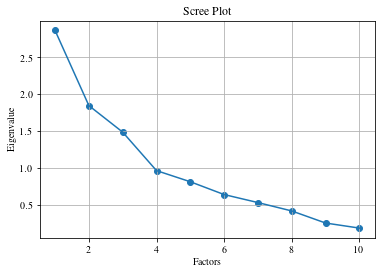

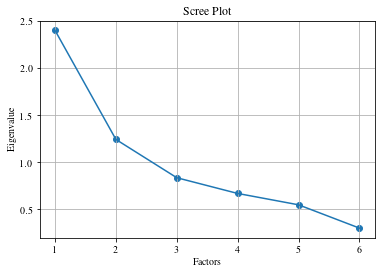

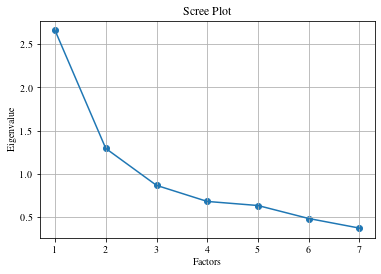

In [45]:
# Create scree plot using matplotlib to enable the optimal choice of factors
factors_choosed = []
for i in range(e_values_df.shape[0]):
    plt.scatter(range(1,e_values_df.iloc[i].shape[0]+1),e_values_df.iloc[i])
    plt.plot(range(1,e_values_df.iloc[i].shape[0]+1),e_values_df.iloc[i])
    plt.title('Scree Plot')
    plt.xlabel('Factors')
    plt.ylabel('Eigenvalue')
    plt.grid()
    plt.show()

In [77]:
#Obtaining number of factors to be returned for each section
def factor_count(e_values_df):
    inde = ['Employee turnover', 'Turnover on morale', 'Turnover on performance']
    eval_fact = []    
    for j in range(len(e_values_df.index)):
        cnt=0
        for i in e_values_df.iloc[j]>1: #Based on Kaiser's rule
            if i==True:
                cnt +=1        
        eval_fact.append([cnt])
    eval_fact_df = pd.DataFrame(data = eval_fact, columns =['n_factors'], index = inde)
    return eval_fact_df

In [84]:
evaluated_factors = factor_count(e_values_df)

In [91]:
def loadings_obtainer(section,sec_name,factors):
    # Performing the actual factor analysis based on the resolved number of factors
    # Create factor analysis object and perform factor analysis
    fa = FactorAnalyzer(rotation="varimax",impute = "drop",n_factors=factors)
    fa.fit(section)
    #obtaining factor loadings
    loading_section = pd.DataFrame(fa.loadings_,index=section.columns)
    round(loading_section,1).to_csv(f'{sec_name}_factor_loadings.csv')
    return loading_section
    

In [86]:
#e_values_df.head()

In [92]:
# looping over and getting factor loadings for each section
for i,sec_n,factors in zip(range(len(ds)-1),evaluated_factors.index,evaluated_factors['n_factors']):
    section = data[data.columns[ds[i]:ds[i+1]]]
    loadings_obtainer(section,sec_n,factors)

#### On adjusted dataset


In [277]:
data_adj_text = data_text_adjusted[data_text_adjusted.columns[4:]]

In [278]:
data_adj_num = data_adjusted[data_adjusted.columns[4:]]

In [279]:
#Defining new cumulative count for adjusted dataset
rs = 0 
ds_c = []
sects = [0]+columns_select_sec
for i in range(len(sects)):
    rs+=sects[i]
    ds_c.append(rs)
ds_c

[0, 4, 8, 14]

In [280]:
# Conducting the Barletts Spherity test
Bst = []
inde = ['Employee turnover', 'Turnover on morale', 'Turnover on performance'] 
for i in range(len(ds_c)-1):
    chi_square_value,p_value=calculate_bartlett_sphericity(data_adj_num[data_adj_num.columns[ds_c[i]:ds_c[i+1]]])#frame_for_conbach = data[]
    Bst.append([round(chi_square_value,3),round(p_value,3)])
BST_df = pd.DataFrame(data = Bst, columns =['Chi-square','p-value'], index = inde)

In [281]:
BST_df.to_csv('Barletts_Spherity_adjusted.csv')

In [282]:
KMO = []
inde = ['Employee turnover', 'Turnover on morale', 'Turnover on performance'] 
for i in range(len(ds_c)-1):
    kmo_all,kmo_model=calculate_kmo(data_adj_num[data_adj_num.columns[ds_c[i]:ds_c[i+1]]])
    #frame_for_conbach = data[data.columns[ds[i]:ds[i+1]]]
    KMO.append([kmo_model])
KMO_df = pd.DataFrame(data = KMO, columns =['KMO'], index = inde)
#kmo_all,kmo_model=calculate_kmo(df)

In [283]:
KMO_df.to_csv('KMO_results_adjusted.csv')

In [286]:
data_adj_num.shape

(42, 14)

In [287]:
ds_c

[0, 4, 8, 14]

##### Proceeding to factor analysis

In [288]:
## Computing eigen values to determine the number of factors by Kaiser creteria
e_values = []
inde = ['Employee turnover', 'Turnover on morale', 'Turnover on performance'] 
for i in range(len(ds_c)-1):
    section = data_adj_num[data_adj_num.columns[ds_c[i]:ds_c[i+1]]]
    fa = FactorAnalyzer(rotation = None,impute = "drop",n_factors=section.shape[1])
    #fa = FactorAnalyzer()
    fa.fit(section)#, 25, rotation=None)
    # Check Eigenvalues
    ev, v = fa.get_eigenvalues()
    e_values.append(ev)
    #kmo_all,kmo_model=calculate_kmo()
    #frame_for_conbach = data[data.columns[ds[i]:ds[i+1]]]
    #KMO.append([kmo_model])
#e_values
e_values_df = pd.DataFrame(data = e_values, columns =[f"EV_{i+1}"for i in range(max([e_values[i].shape[0] for i in range(len(e_values))]))], index = inde)

In [289]:
e_values_df

,EV_1,EV_2,EV_3,EV_4,EV_5,EV_6
Employee turnover,2.455048,0.781567,0.433297,0.330088,NaN,NaN
Turnover on morale,2.214102,0.855246,0.567240,0.363412,NaN,NaN
Turnover on performance,2.573564,1.122672,0.737133,0.670532,0.516837,0.379262


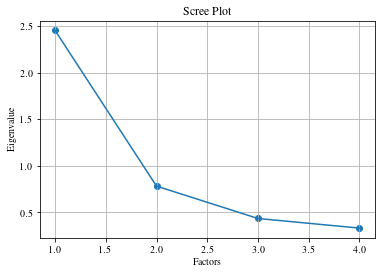

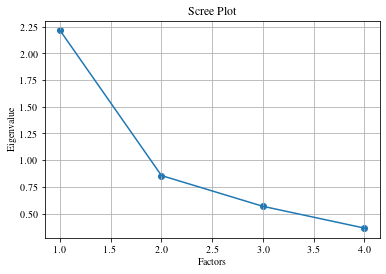

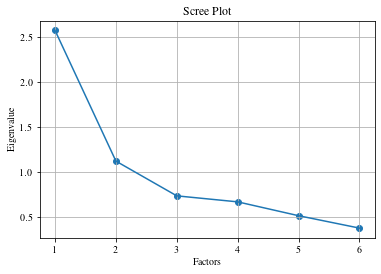

In [290]:
# Create scree plot using matplotlib to enable the optimal choice of factors
factors_choosed = []
for i in range(e_values_df.shape[0]):
    plt.scatter(range(1,e_values_df.iloc[i].shape[0]+1),e_values_df.iloc[i])
    plt.plot(range(1,e_values_df.iloc[i].shape[0]+1),e_values_df.iloc[i])
    plt.title('Scree Plot')
    plt.xlabel('Factors')
    plt.ylabel('Eigenvalue')
    plt.grid()
    plt.show()

In [291]:
evaluated_factors = factor_count(e_values_df)

In [292]:
evaluated_factors

,n_factors
Employee turnover,1
Turnover on morale,1
Turnover on performance,2


In [293]:
#data_adj_num

In [294]:
# looping over and getting factor loadings for each section
for i,sec_n,factors in zip(range(len(ds_c)-1),evaluated_factors.index,evaluated_factors['n_factors']):
    section = data_adj_num[data_adj_num.columns[ds_c[i]:ds_c[i+1]]]
    loadings_obtainer(section,f'{sec_n}_adjusted',factors)

## Further Demographic Plots and Chi-square tests
Proceeding with dataset that met reliability test

In [3]:
# Work also on a generic function that inputs a dataframe and return corresponding counts

In [137]:
# Percentage convertion function for any counts dataframe (must be shifted to the function space) some python module
def df_percentage(dataframe): 
    dataframe["Total"] = [dataframe.iloc[i].sum() for i in range(dataframe.shape[0])]
    percentage_data = [((dataframe[dataframe.columns[:-1]].iloc[i]/dataframe[dataframe.columns[-1]].iloc[i])*100).values for i in range(dataframe.shape[0])]
    percentage_dataframe = pd.DataFrame(data = percentage_data, columns = dataframe.columns[:-1], index = dataframe.index)
    return percentage_dataframe

# For Demographic Plots

## Raw data analysis

In [138]:
import matplotlib.pyplot as plt
import seaborn as sns

In [309]:
#data_text_adjusted  # working with the dataset that passes both validity and reliability tests

In [310]:
#data_text_adjusted

In [311]:
#renaming columns
raw_data = data_text_adjusted
raw_data.columns  = new_columns

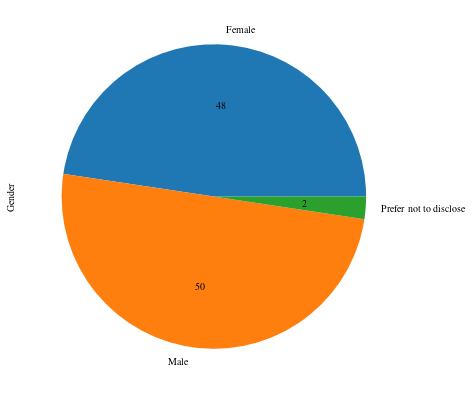

In [312]:
# Plots
raw_data.groupby(['Gender']).size().plot(kind='pie', y='Gender',label = 'Gender',figsize=(7,7), autopct='%1.0f%%')
plt.savefig('gender_pie.png',facecolor='white', transparent=False)

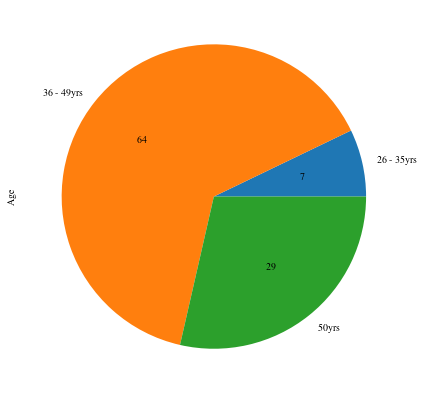

In [317]:
# Plots
raw_data.groupby(['Age']).size().plot(kind='pie', y='Age',label = 'Age',figsize=(7,7), autopct='%1.0f%%')
plt.savefig('age_pie_chart.png',facecolor='white', transparent=False)

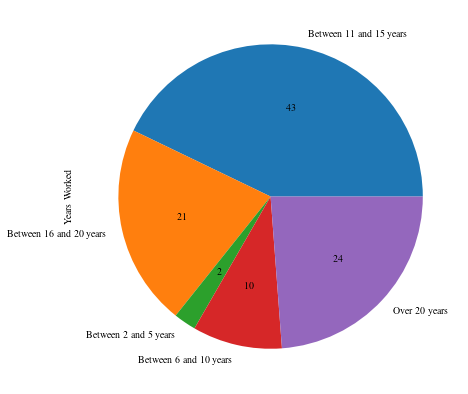

In [318]:
# Plots
raw_data.groupby(['Years Worked']).size().plot(kind='pie', y='Years Worked',label = 'Years Worked',figsize=(7,7), autopct='%1.0f%%')
plt.savefig('Years_Worked.png',facecolor='white', transparent=False)

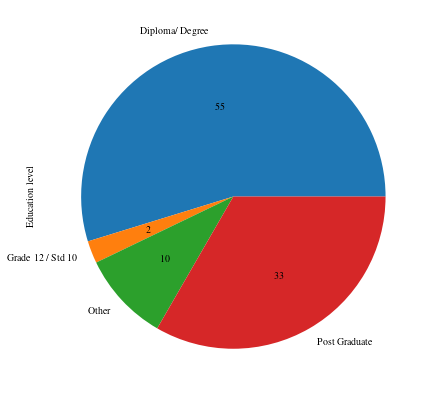

In [322]:
# Plots
raw_data.groupby(['Education level']).size().plot(kind='pie', y='Education level',label = 'Education level',figsize=(7,7), autopct='%1.0f%%')
plt.savefig('Education_level.png',facecolor='white', transparent=False)

In [332]:
def singlevar_bar_plotter(data,col='Years Worked',title=''):
    
    Years_worked = pd.DataFrame(data.groupby([col]).size(),columns = ['Counts'])

    Years_worked['percentages'] = (Years_worked.Counts/Years_worked.Counts.sum())*100

    fig, ax = plt.subplots(figsize=(10, 7))
    for key, value in zip(Years_worked.index, Years_worked.percentages):
        bar = ax.bar(key, value, label=key)
        ax.bar_label(bar, labels=[f'{value:.1f}%'])    
    plt.title(f'{title}',fontdict={'fontsize':18})   
    plt.ylabel('Percentages',fontsize = 14)
    plt.grid(axis='y')
    plt.xticks(rotation=45,fontsize = 14,)
    #plt.yticks()
    plt.savefig(f'{title}_barchart.png',facecolor='white',transparent=False,bbox_inches='tight')
    plt.show()

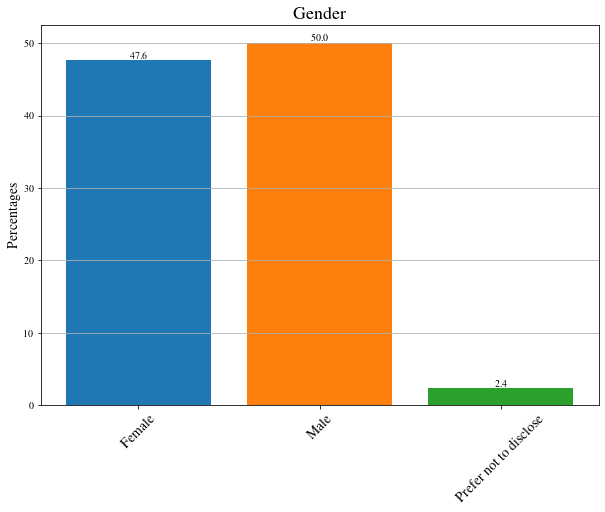

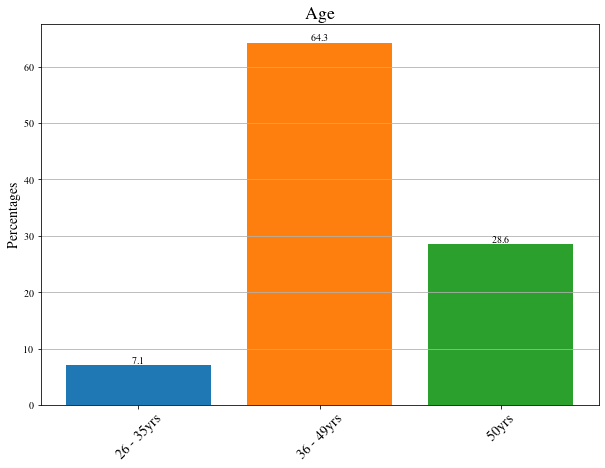

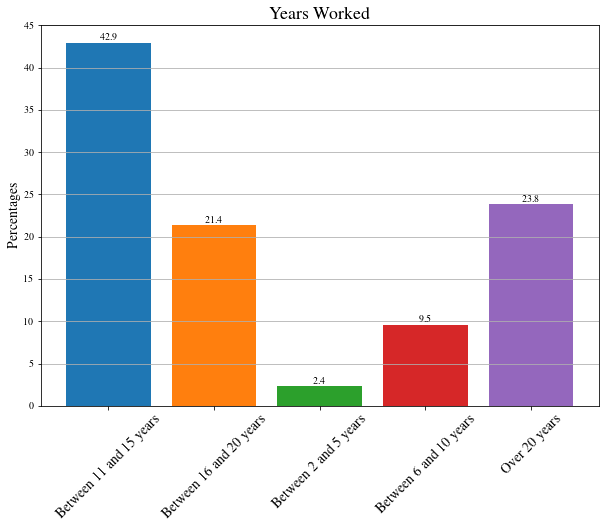

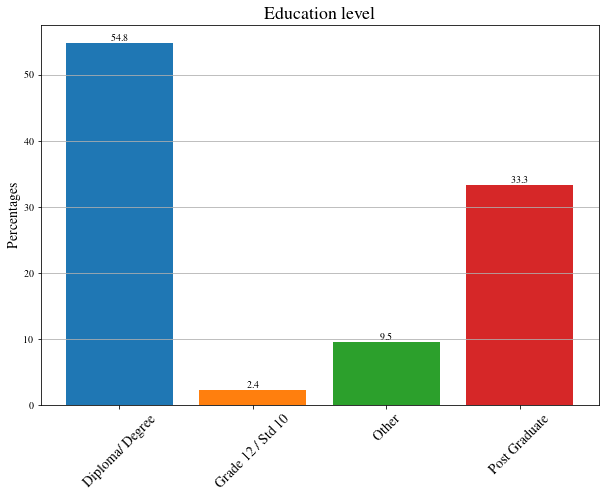

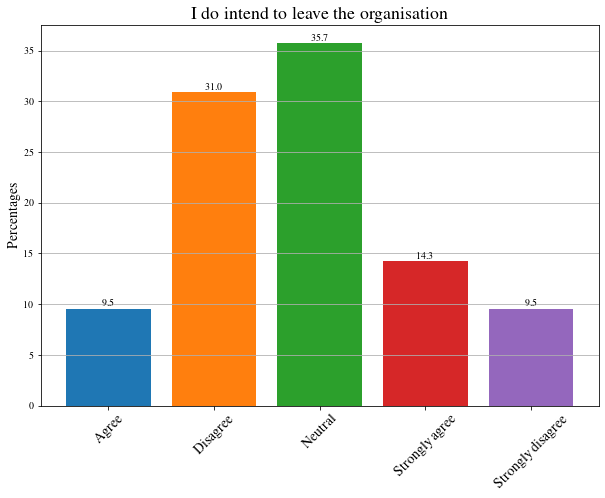

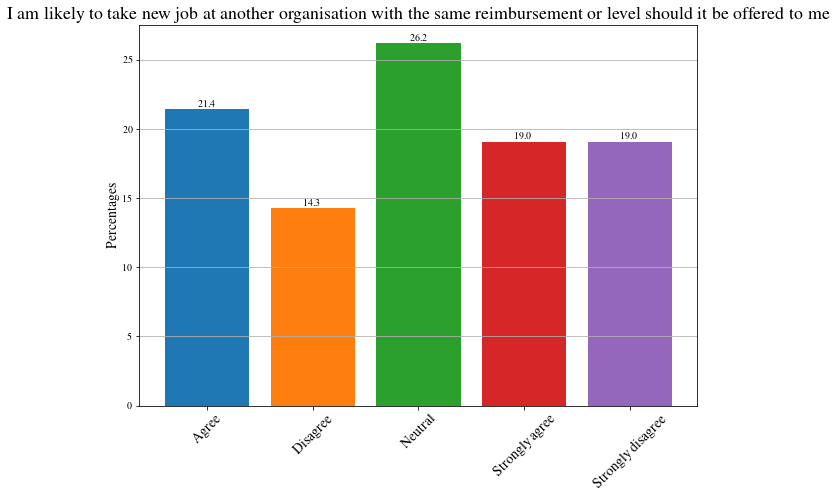

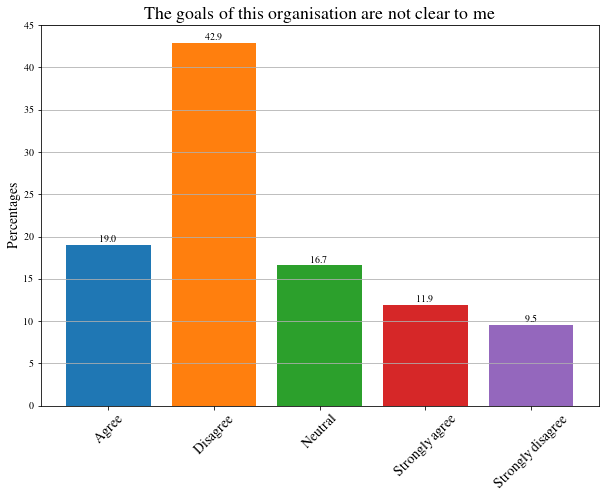

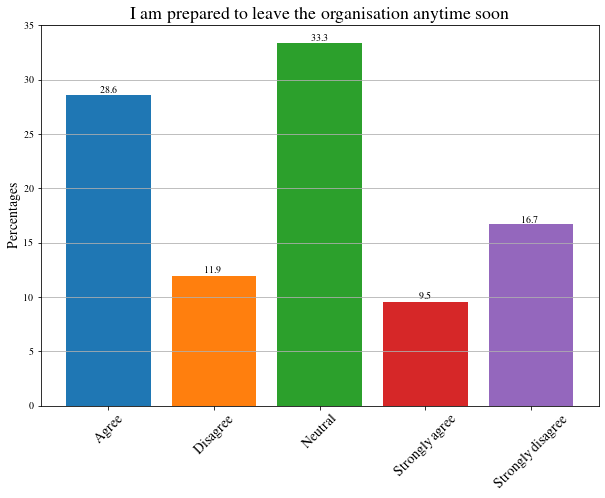

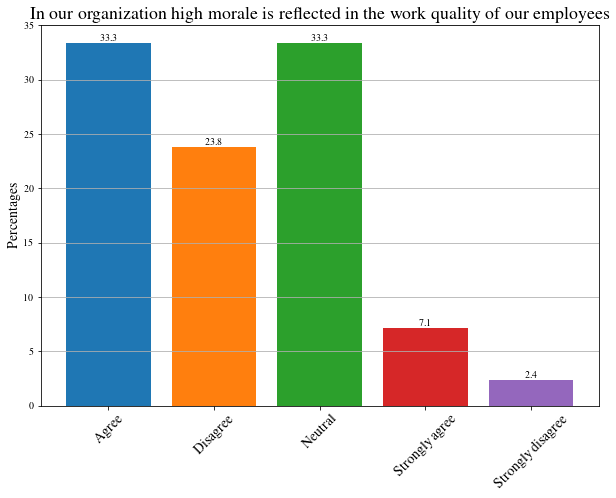

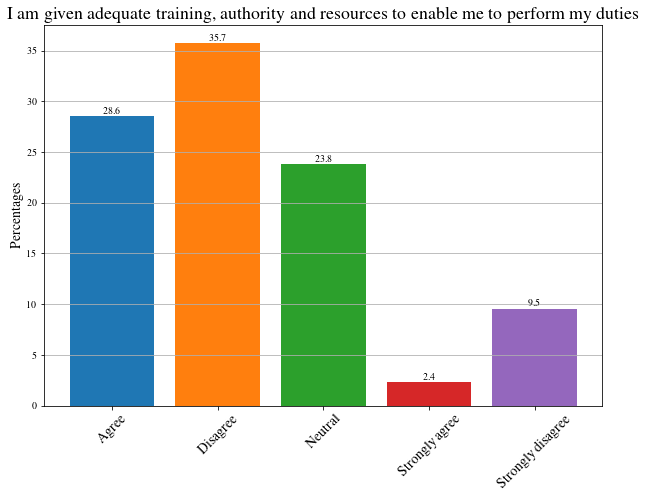

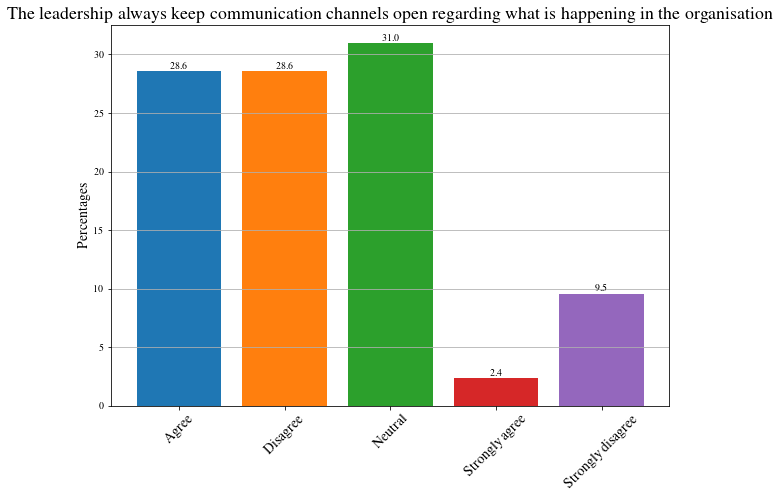

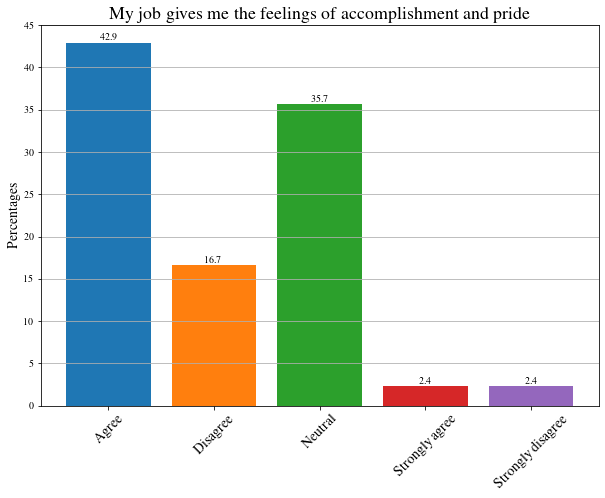

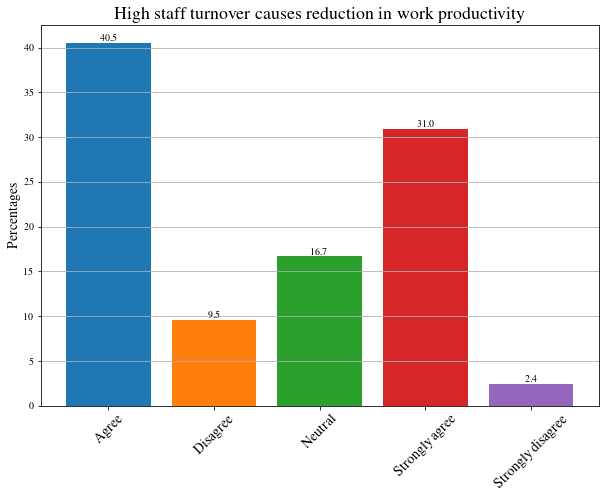

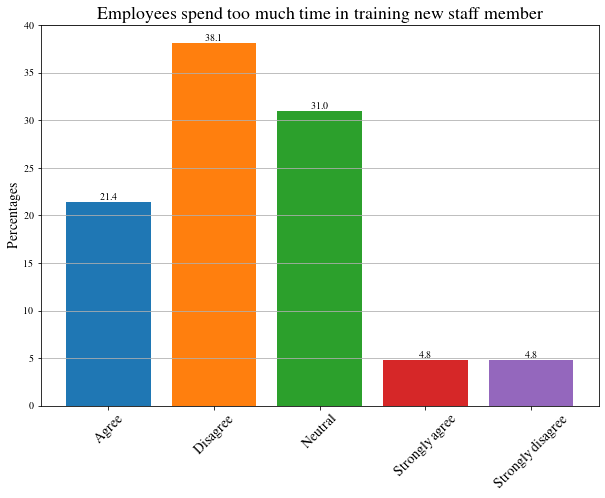

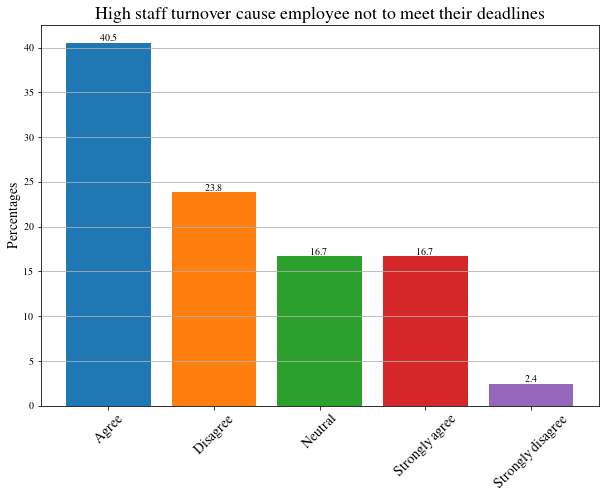

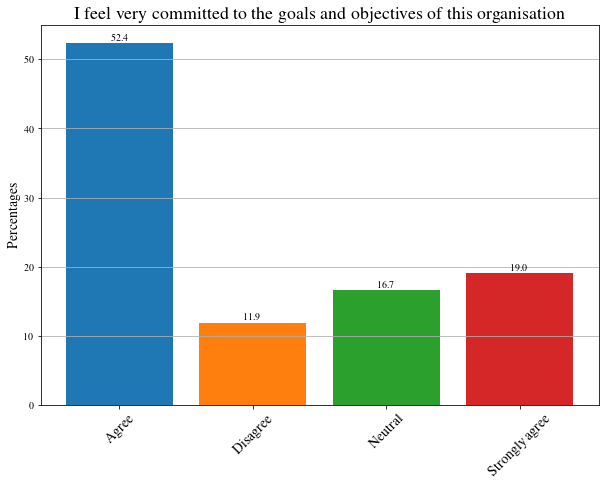

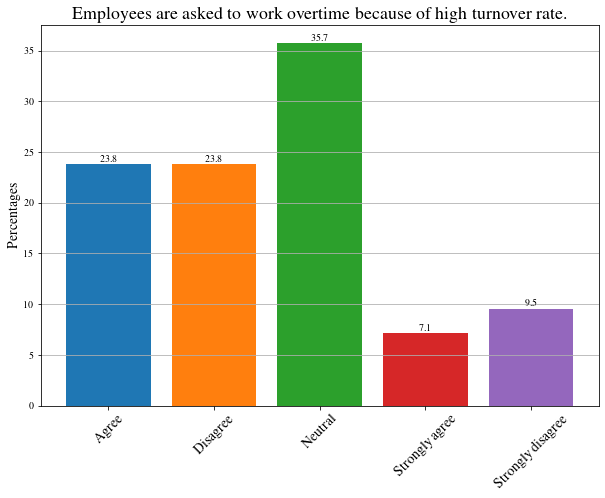

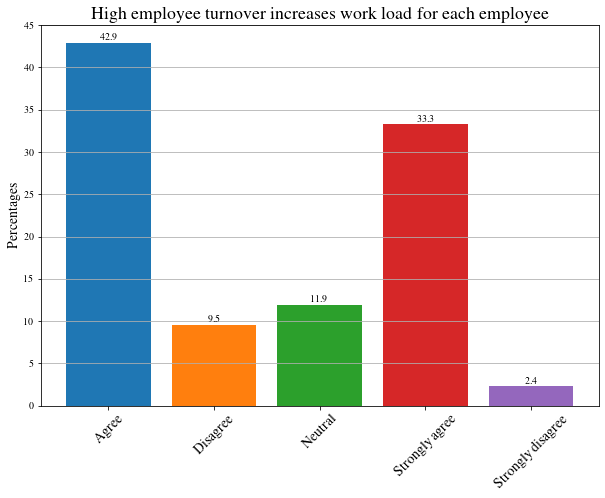

In [333]:
for col,i in zip(data_text_adjusted,range(len(data_text_adjusted.columns))):
    singlevar_bar_plotter(data_text_adjusted,col=col,title=col)

In [326]:
def count_on_col(data,dem_col='Education level',asses_col='B1.1'):    
    EL = data[dem_col].unique()
    count_per_EL = []
    for el in EL:
        keeper = {'Agree':0,'Disagree':0,'Neutral':0,'Strongly agree':0,'Strongly disagree':0}
        pres = data.groupby([dem_col, asses_col]).size()[el].to_dict()
        keeper.update(pres)
        count_per_EL.append(list(keeper.values()))
        con = np.array(count_per_EL).T
        con_sum = con.sum(axis=0)
        percentages =np.round((con/con_sum)*100,1)
    return percentages

In [327]:
def perc_mapper(percentages):            
    keep = {'Agree':0,'Disagree':0,'Neutral':0,'Strongly agree':0,'Strongly disagree':0}
    for i,key in zip(range(percentages.shape[0]),keep.keys()):
        #percentages[percentages==np.nan]=[0]
        keep[key] = tuple(percentages[i])
    return keep

In [334]:
def grouped_plotter(data,percentages,keep,col='Education level',title=''):   
    levels = tuple(data[col].unique())
    penguin_means = keep
    num_items = len(levels)
    x = np.arange(len(levels))  # the label locations
    if col=='Gender':
        margin = 0.4
    elif col=='Age':
        margin = 0.4
    elif col=='Years Worked':
        margin = 0.05
    elif col=='Education level':
        margin = 0.25
    width = (1.-1.5*margin)/num_items #0.25  # the width of the bars
    multiplier = 0

    fig, ax = plt.subplots(layout='constrained',figsize=(10, 7))

    for attribute, measurement in penguin_means.items():
        offset = width * multiplier
        rects = ax.bar(x + offset, measurement, width, label=attribute,linewidth=.4)
        ax.bar_label(rects, padding=3)
        multiplier +=1

    # Add some text for labels, title and custom x-axis tick labels, etc.
    #ax.set_ylabel('Percentage(%)')
    ax.set_title(f'{title} by {col}',fontsize=18)
    ax.set_xticks(x + (1.5*width), levels)
    ax.legend(loc='upper left')#,mode = "expand", ncol = 3)
    ax.set_ylim(0, 110)
    #plt.grid(axis='y')
    plt.ylabel('Percentages',fontsize = 14)
    plt.grid(axis='y')
    plt.xticks(rotation=45,fontsize = 14,)
    #plt.yticks()
    plt.savefig(f'{title} by {col} barchart.png',facecolor='white',transparent=False,bbox_inches='tight')
    #plt.xticks(rotation=45)
    plt.show()

In [179]:
#percentages = count_on_col(data,dem_col=data.columns[2],asses_col=data.columns[20])
#keep = perc_mapper(percentages)
#grouped_plotter(data,percentages,keep,col=data.columns[2])

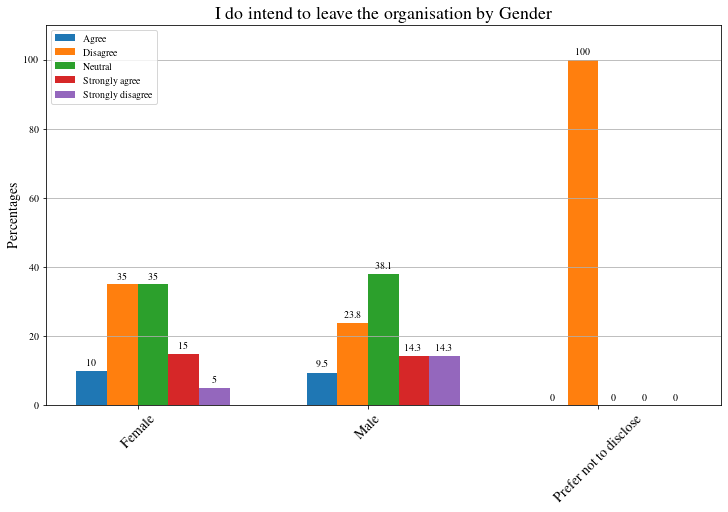

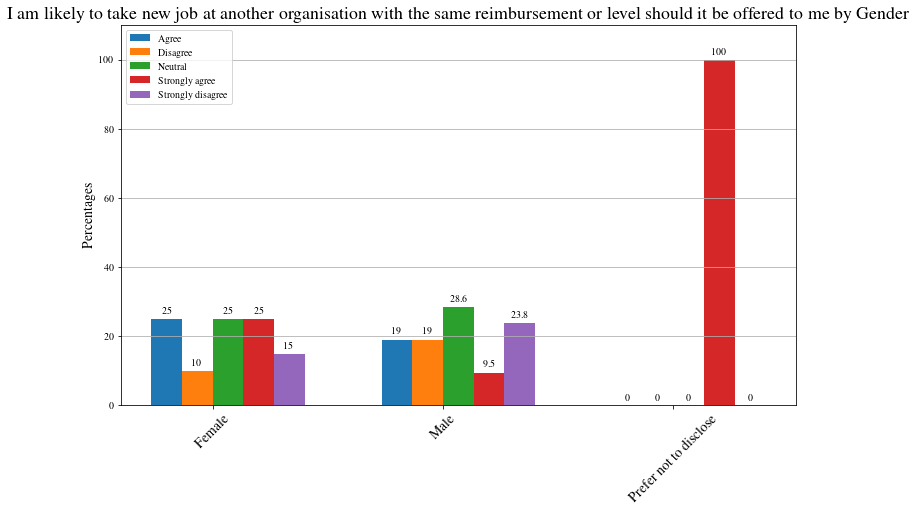

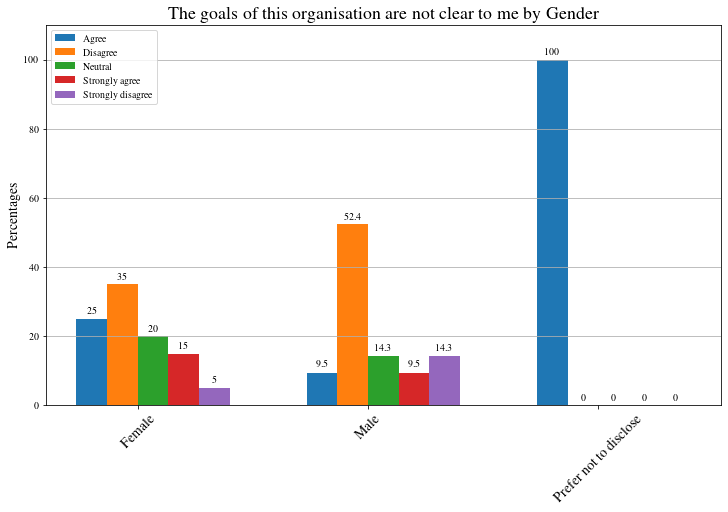

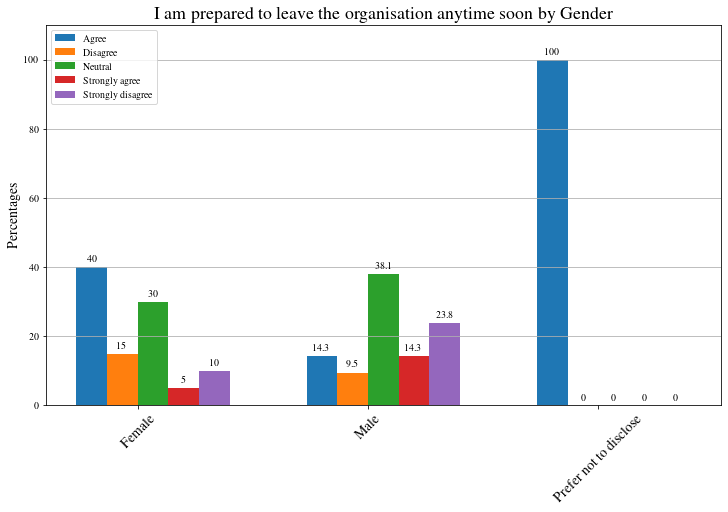

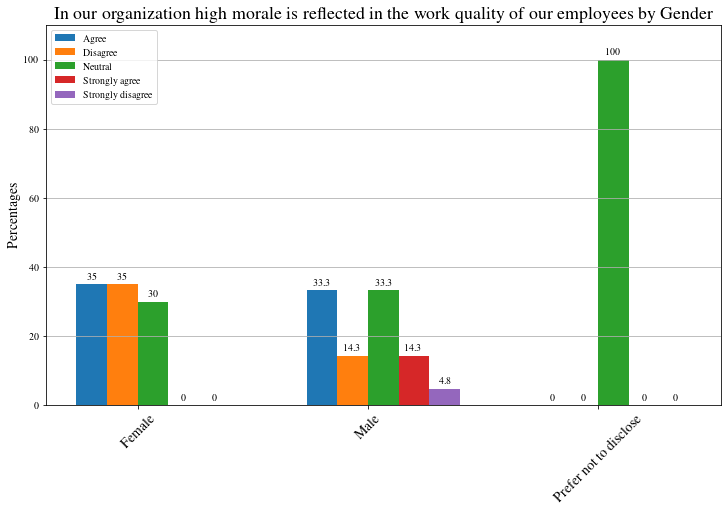

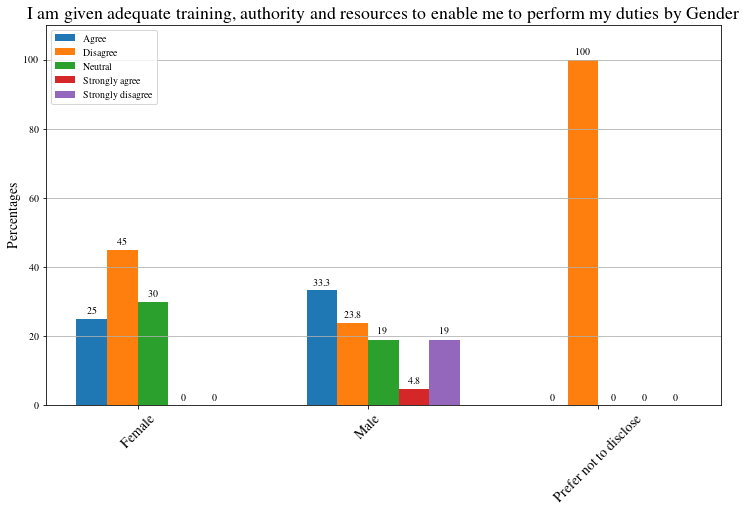

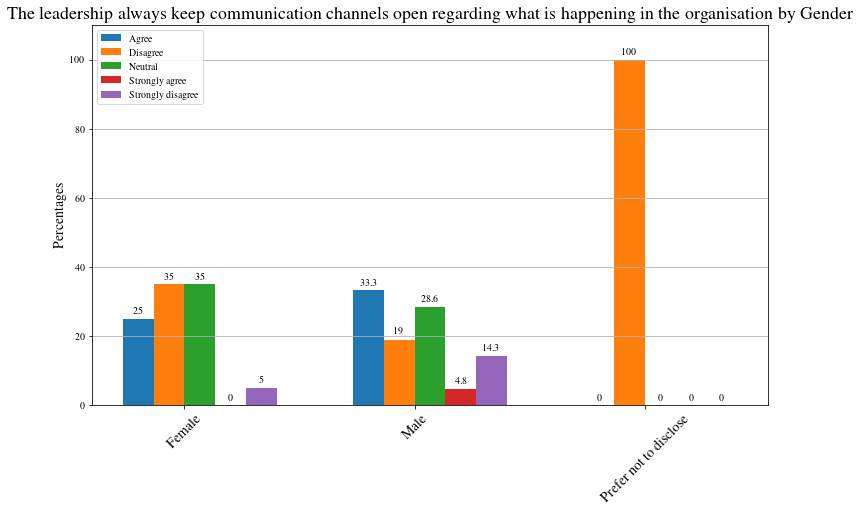

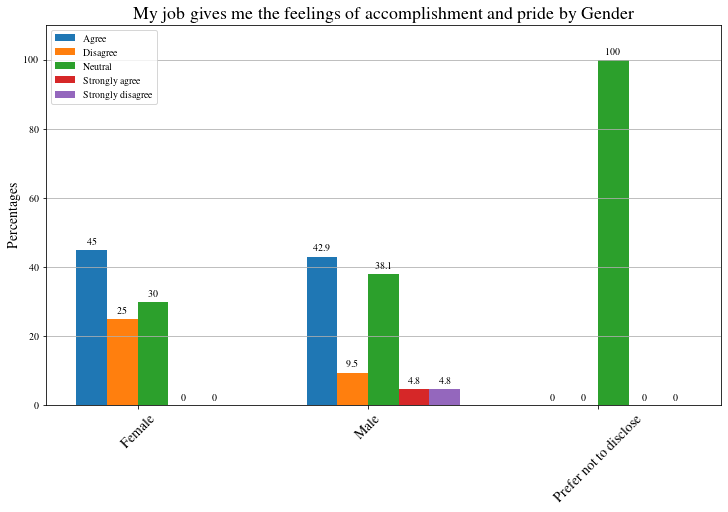

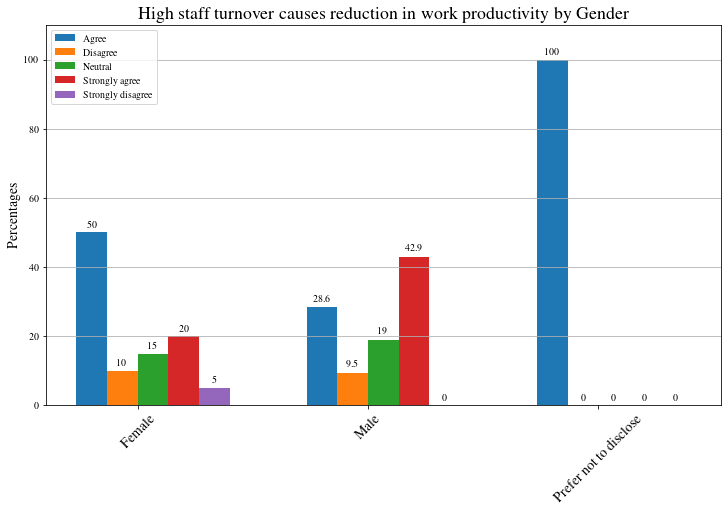

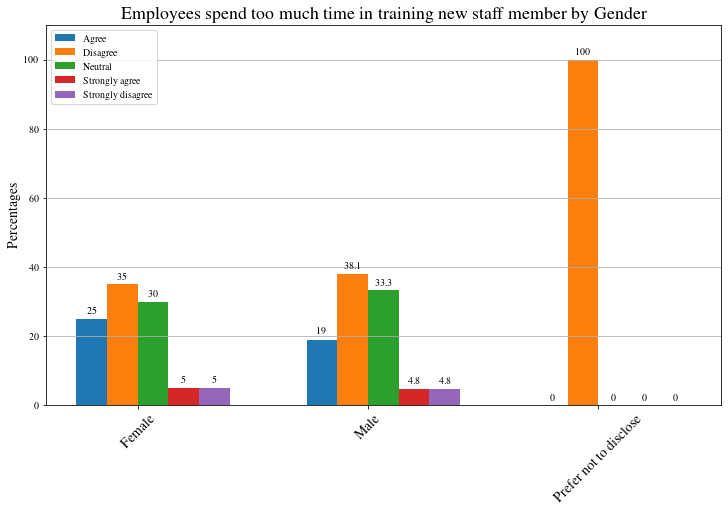

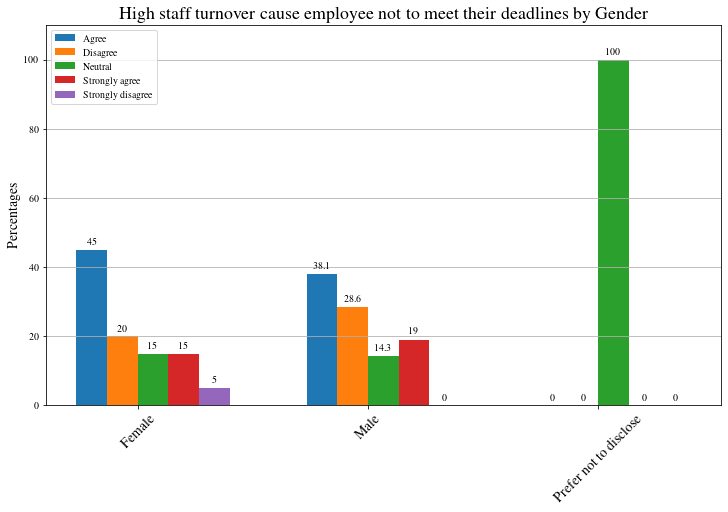

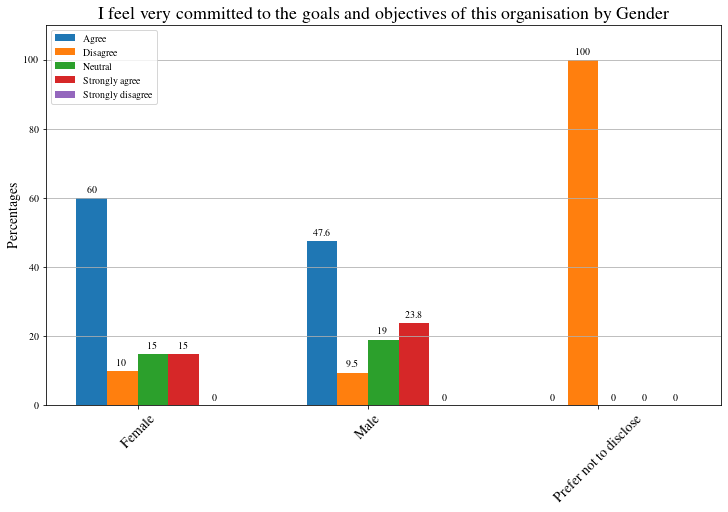

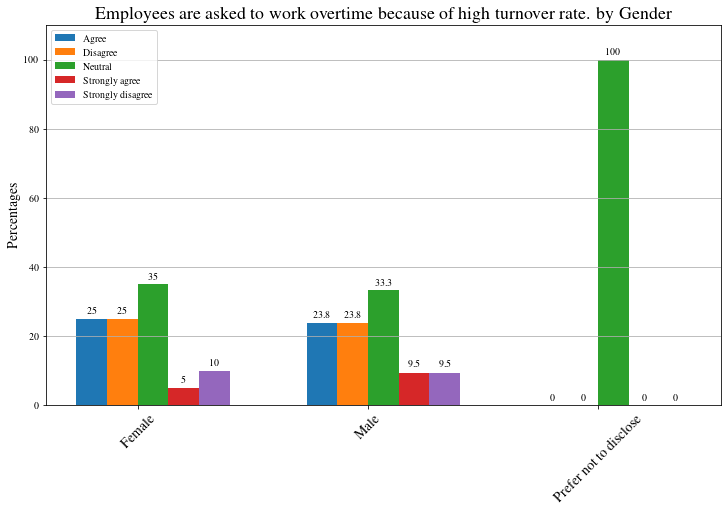

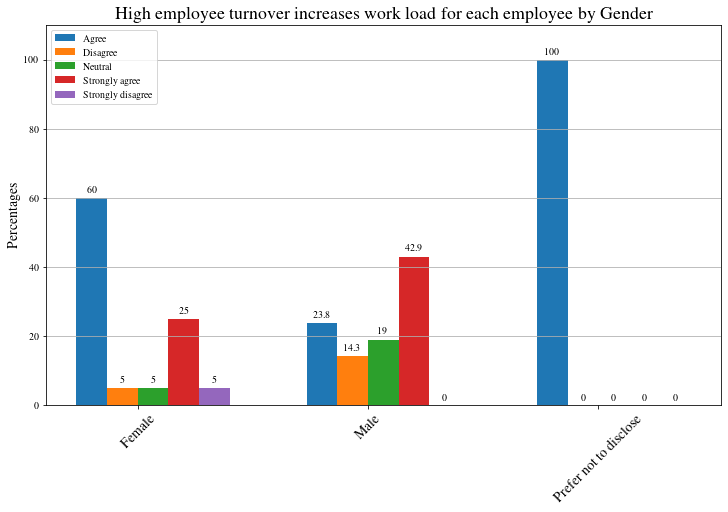

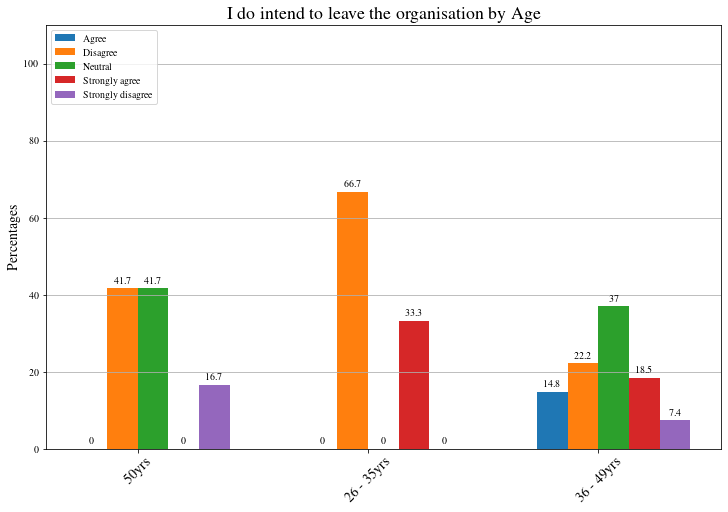

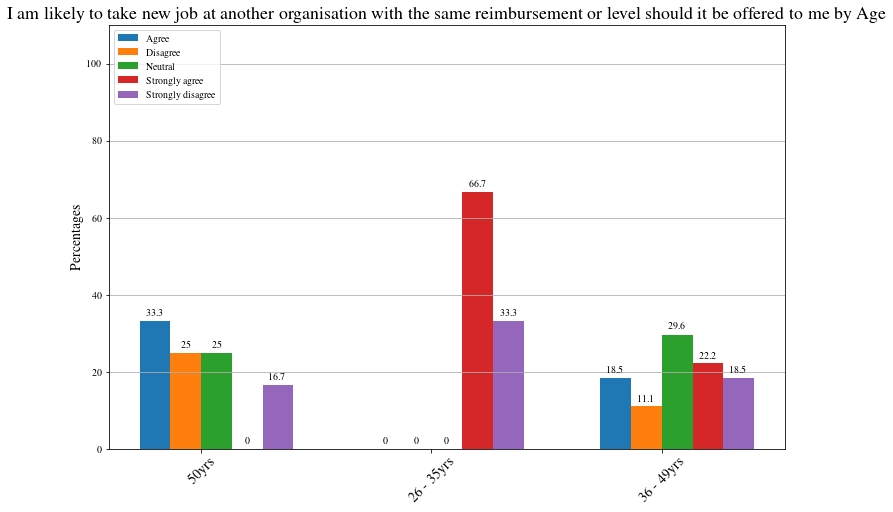

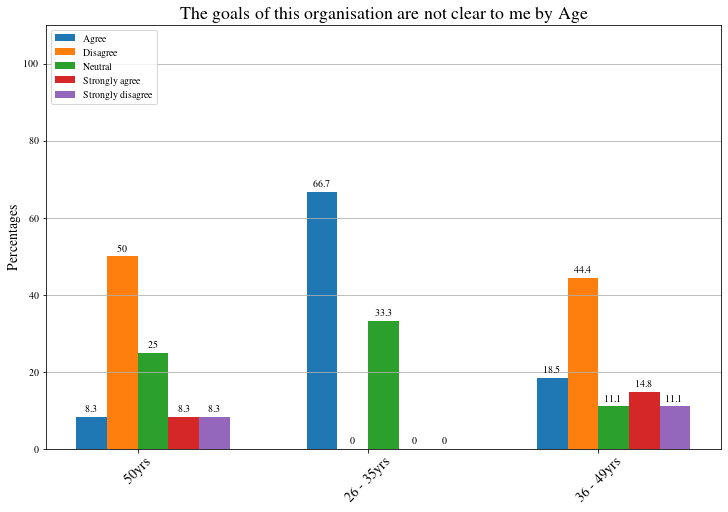

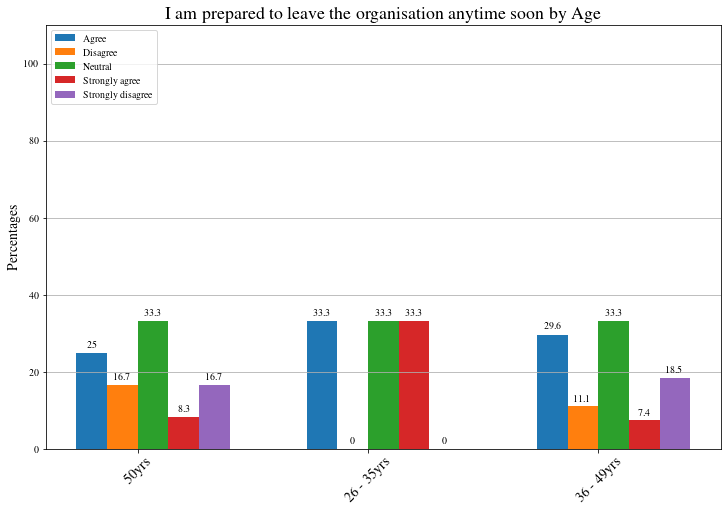

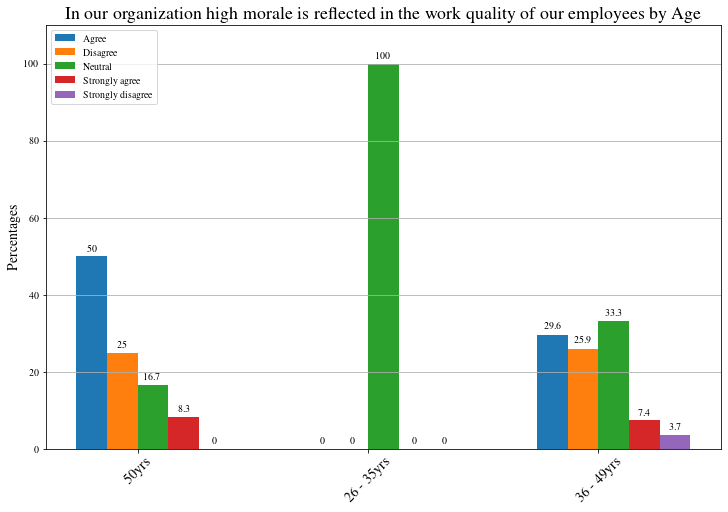

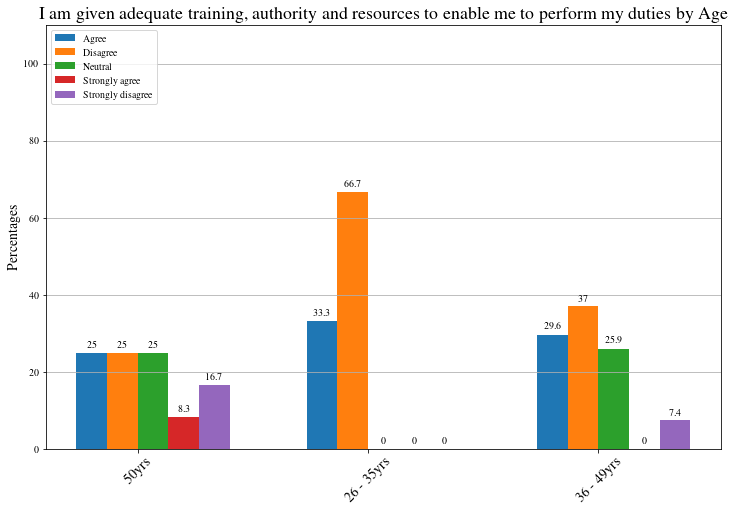

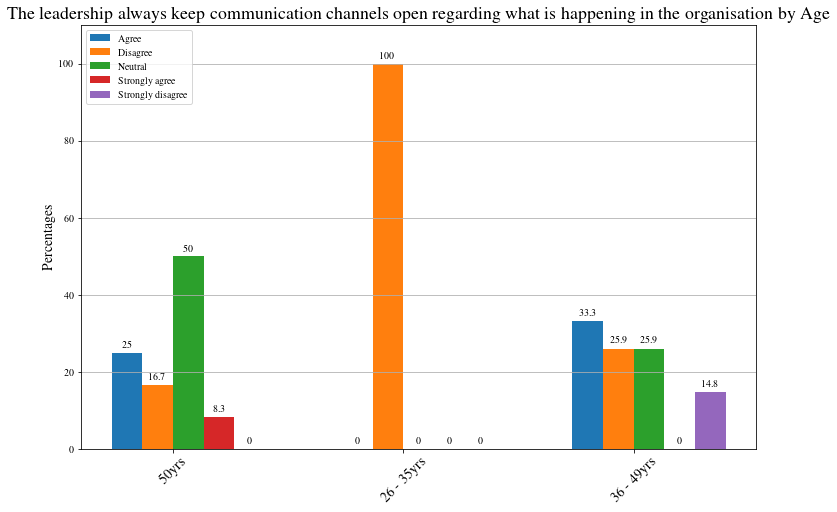

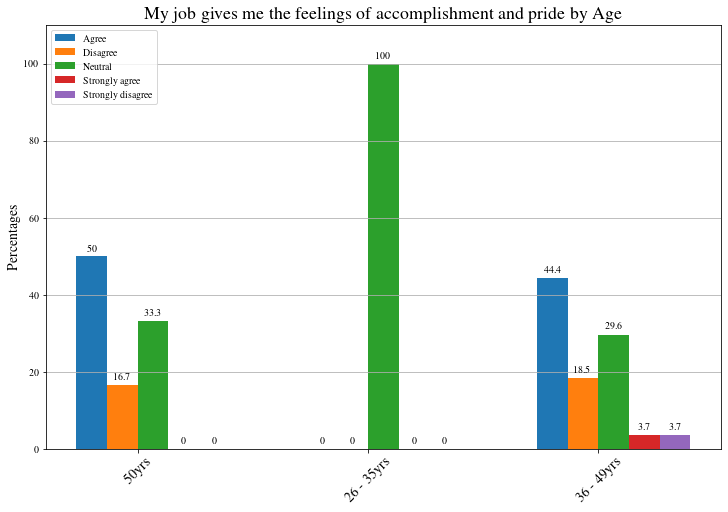

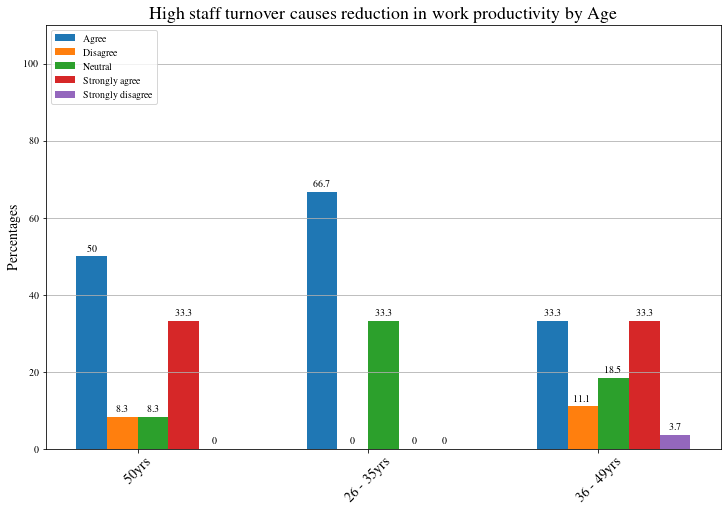

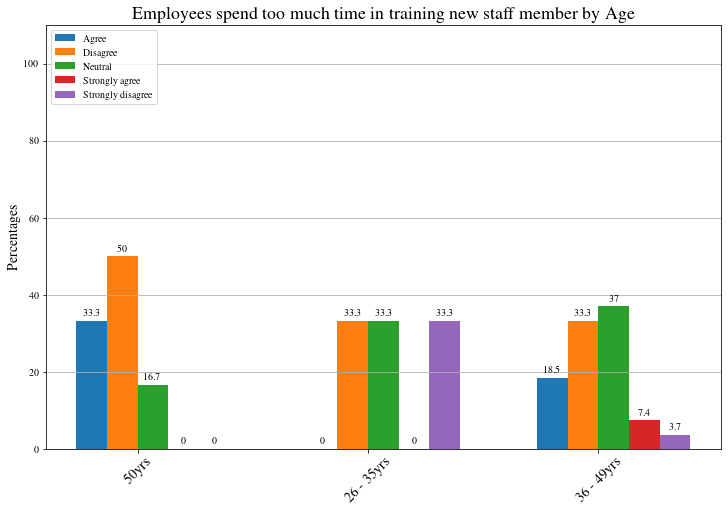

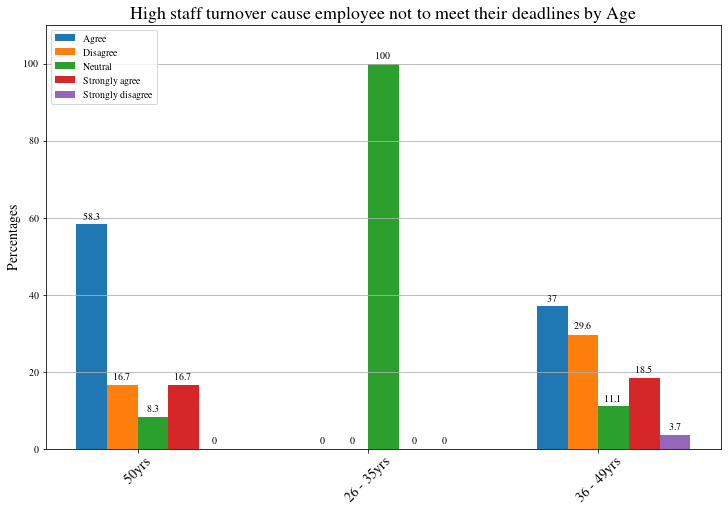

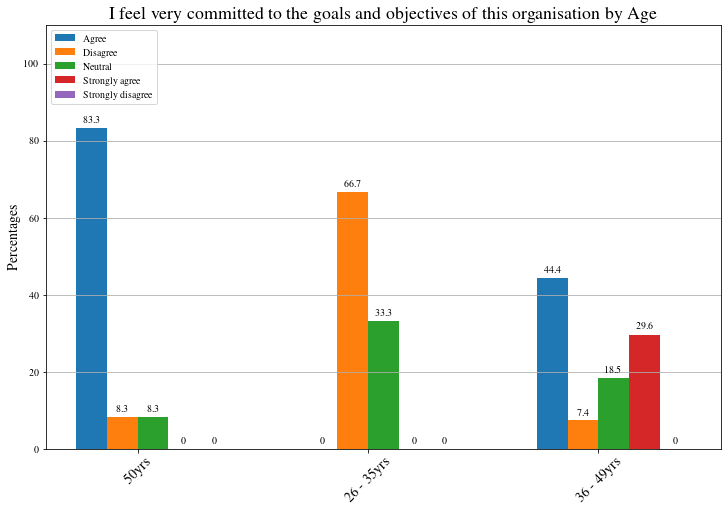

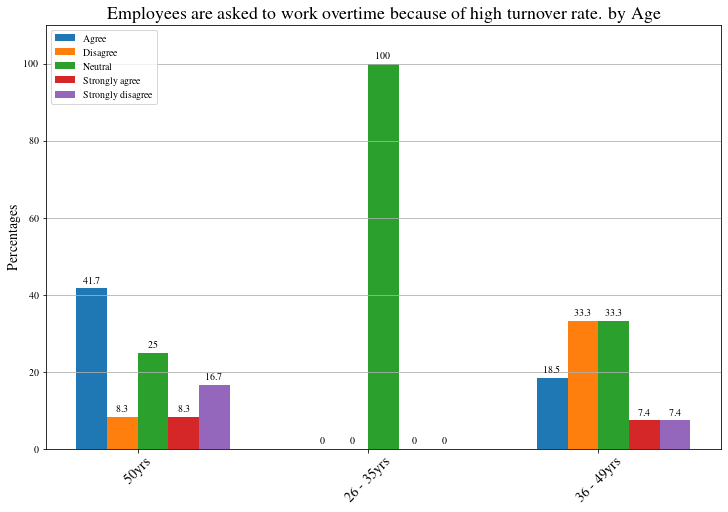

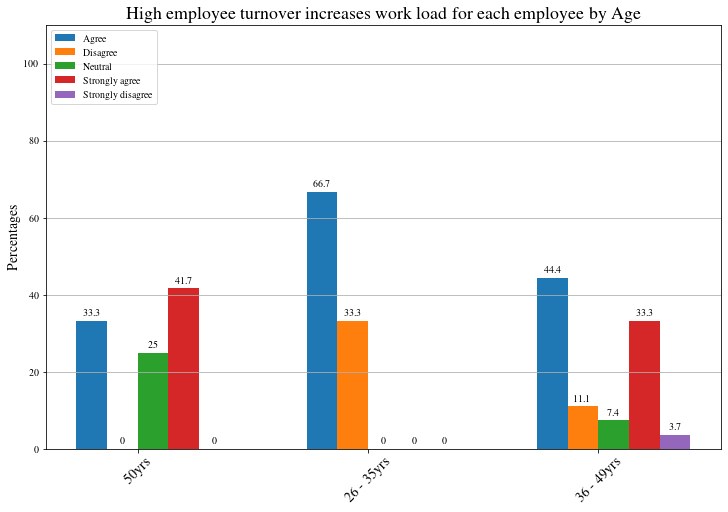

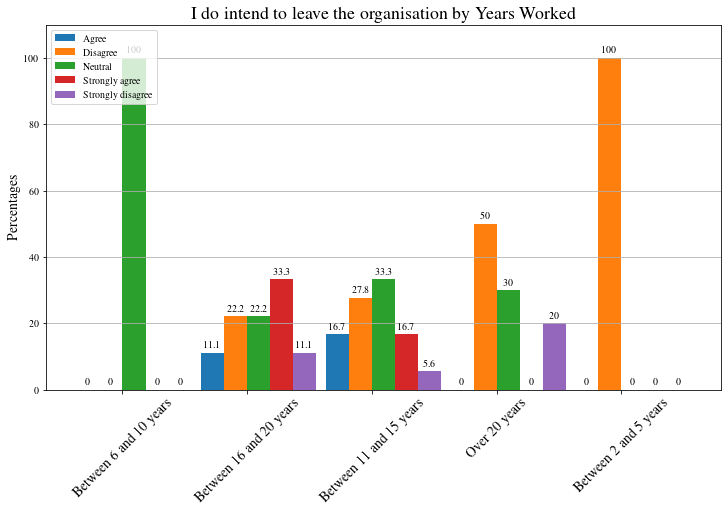

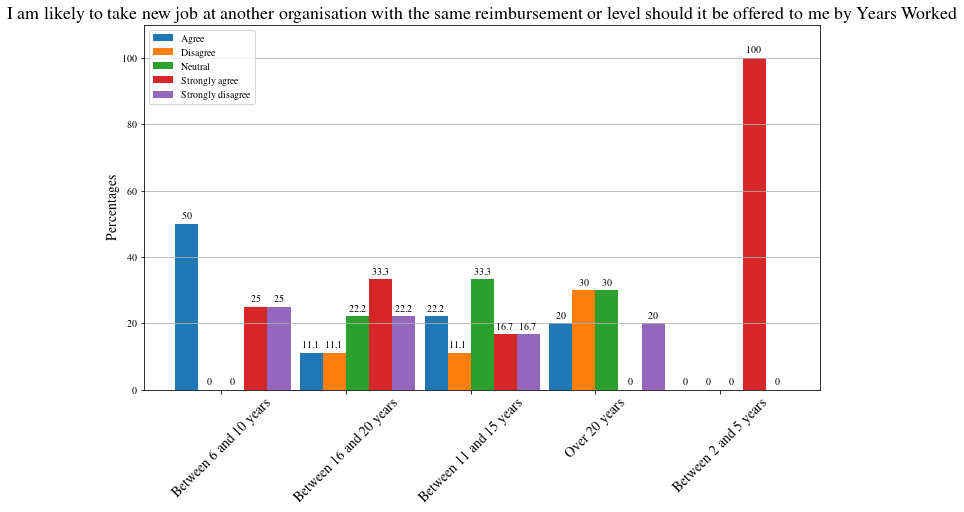

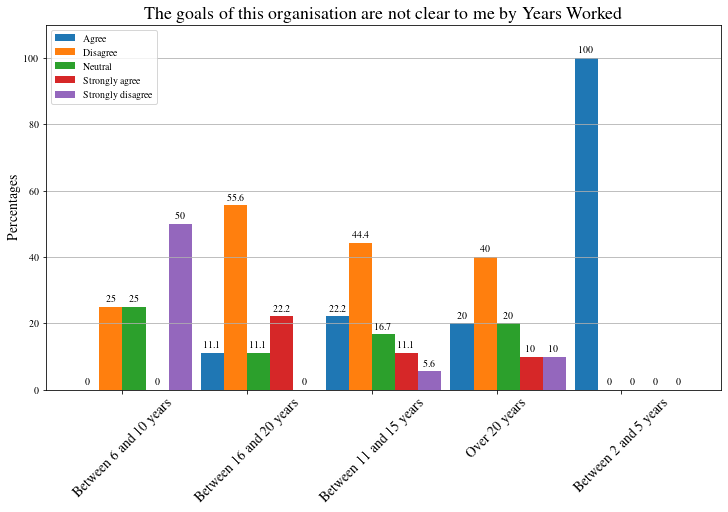

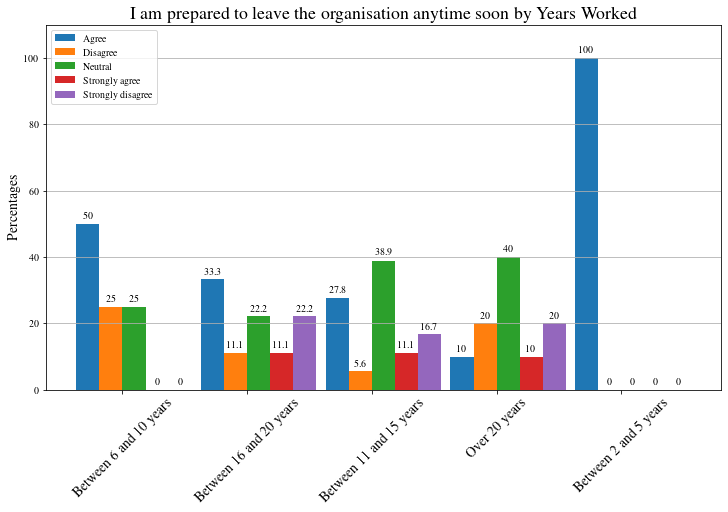

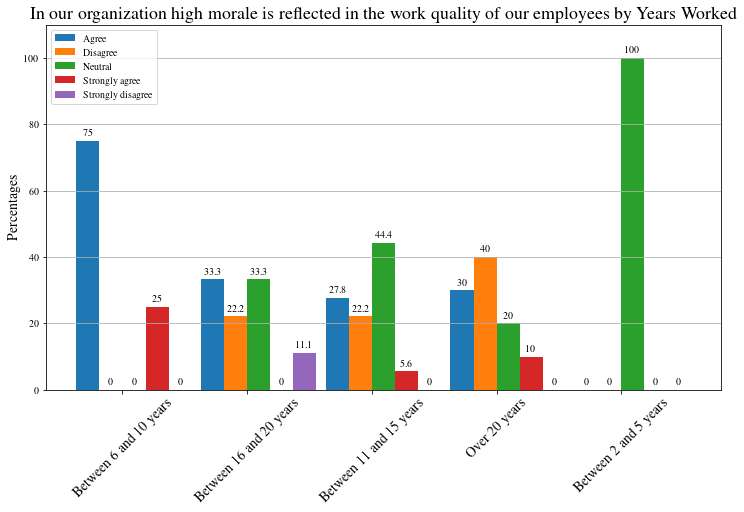

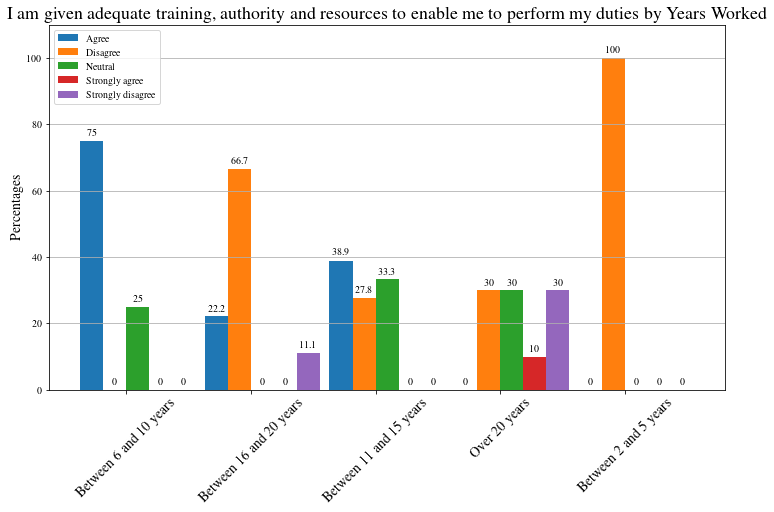

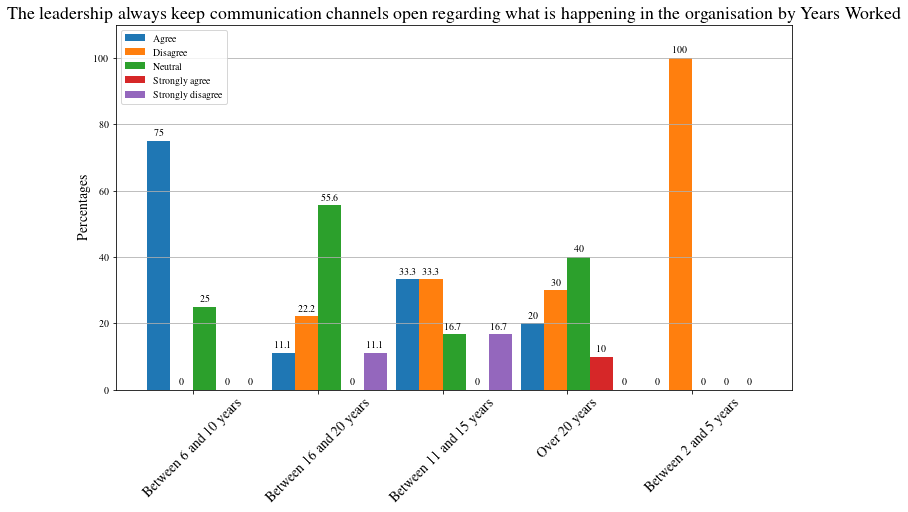

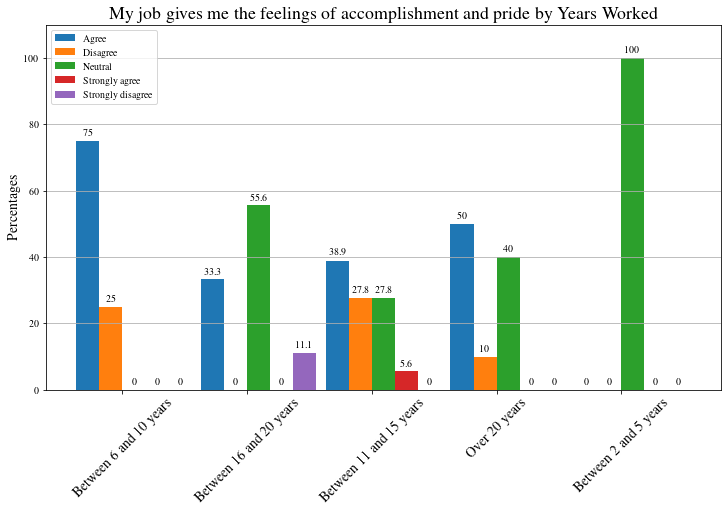

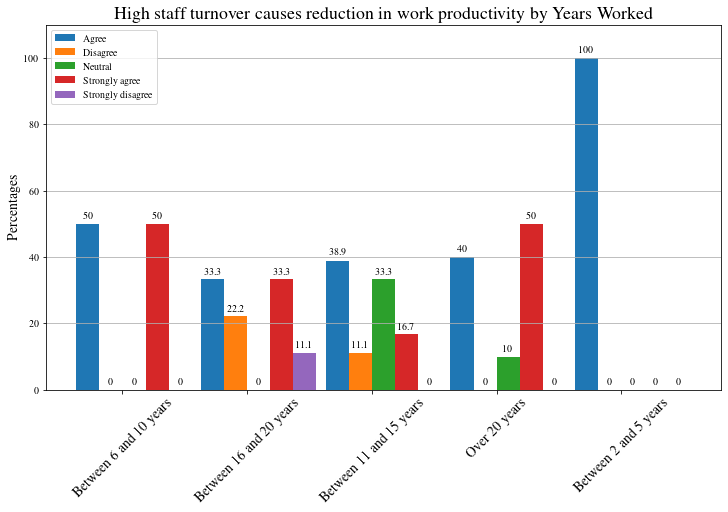

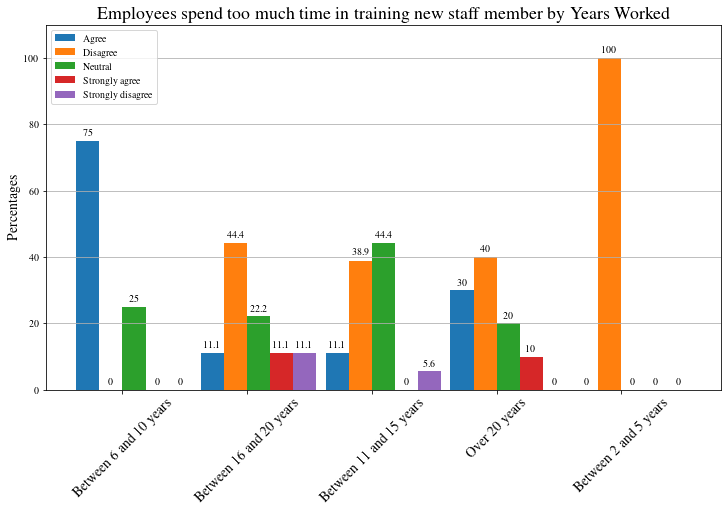

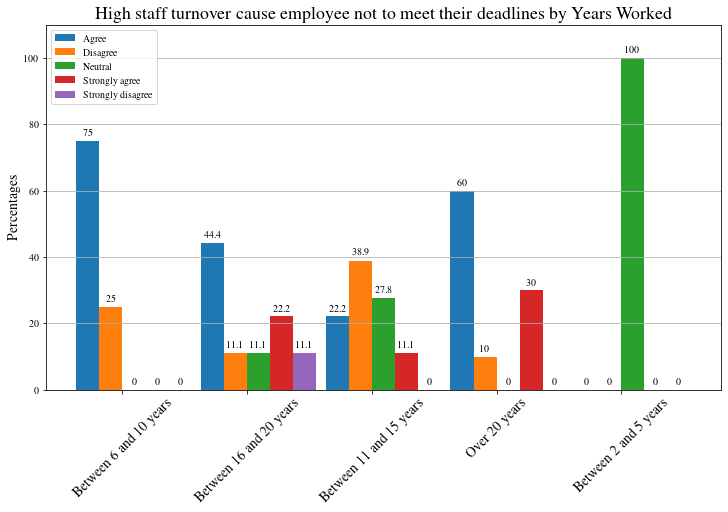

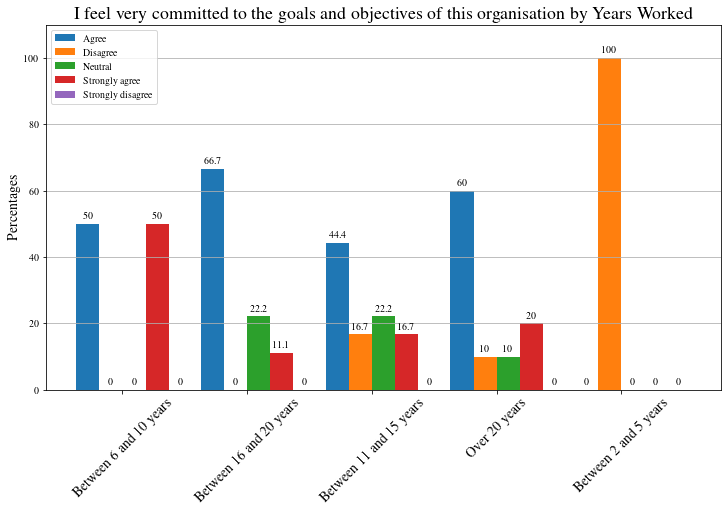

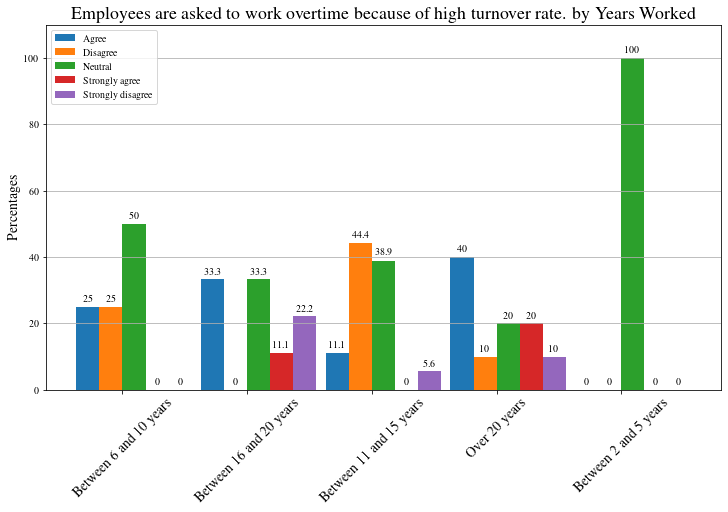

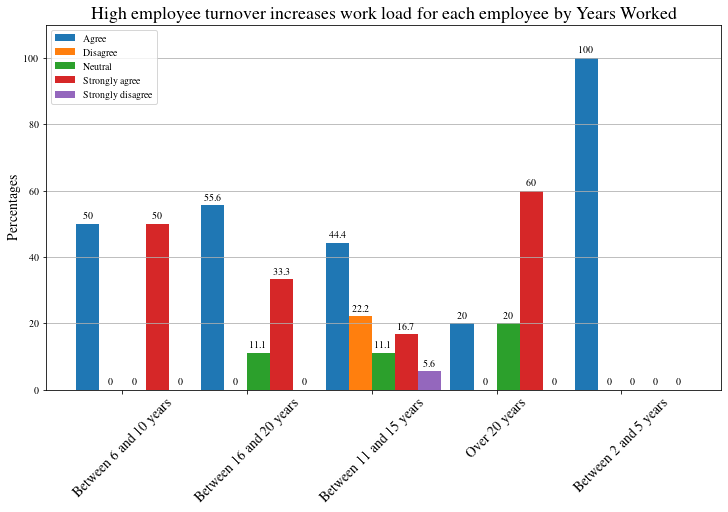

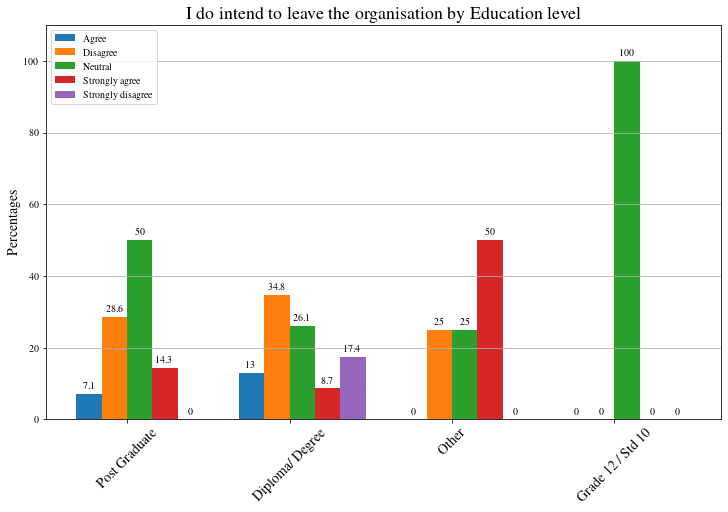

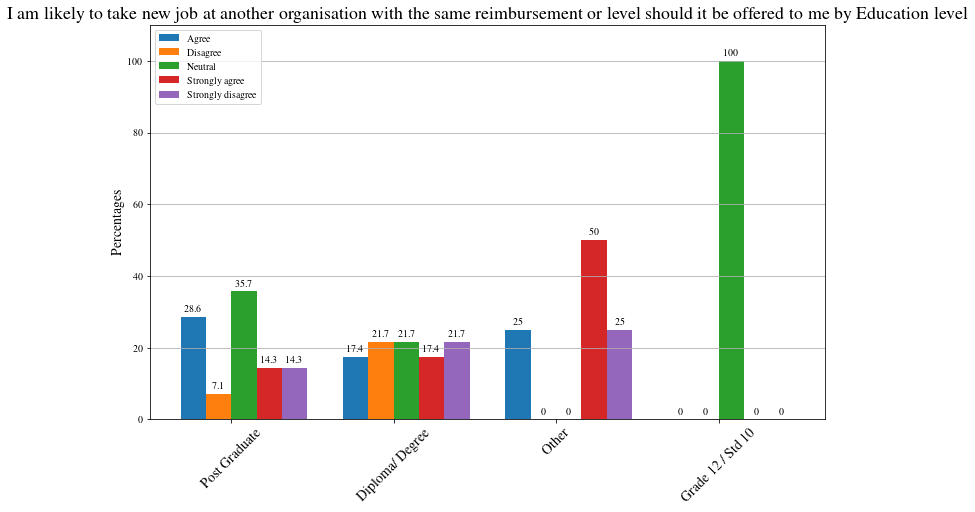

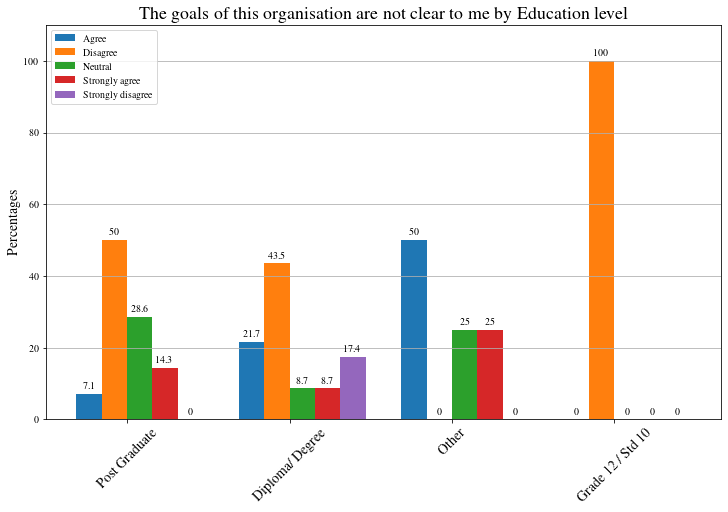

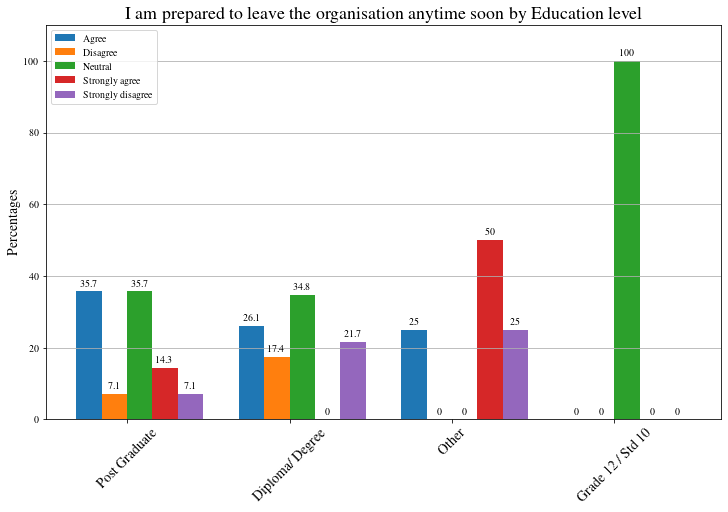

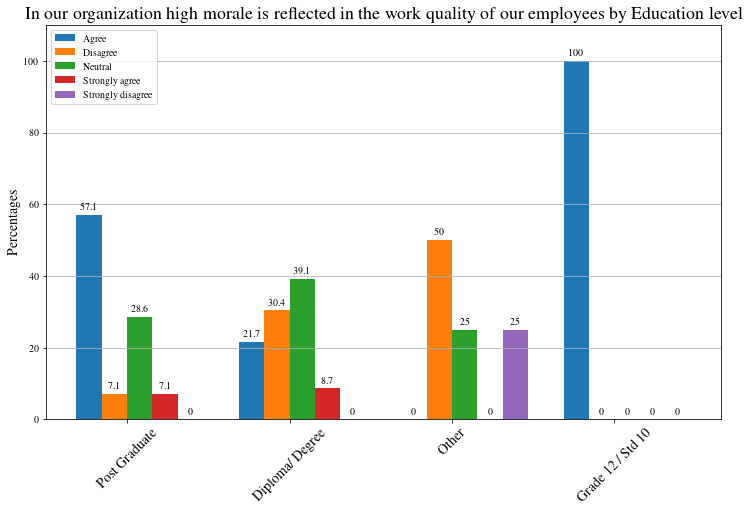

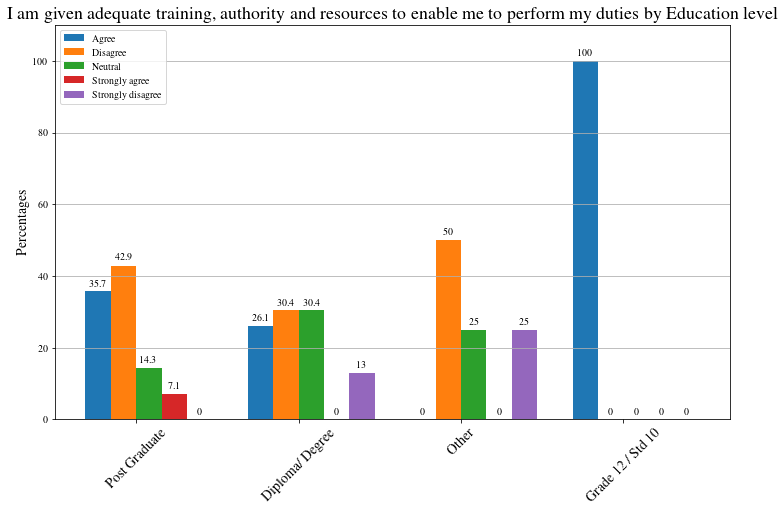

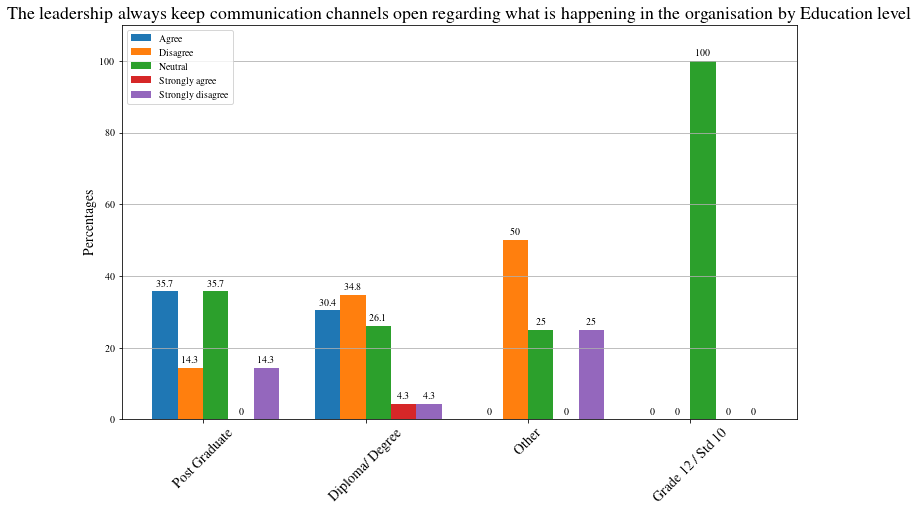

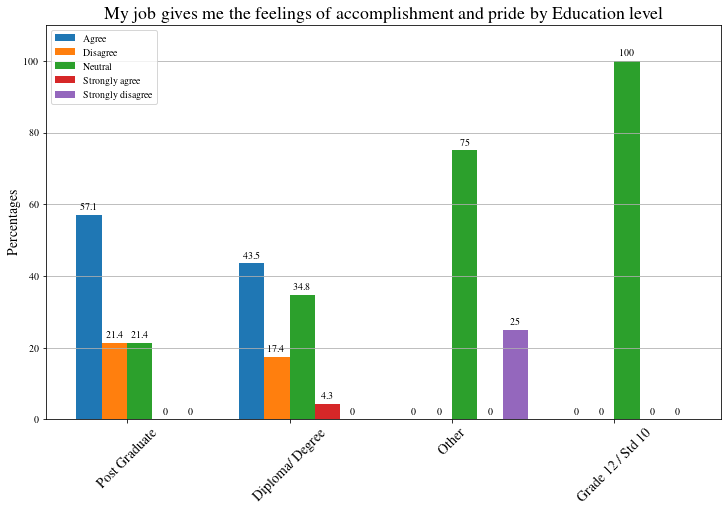

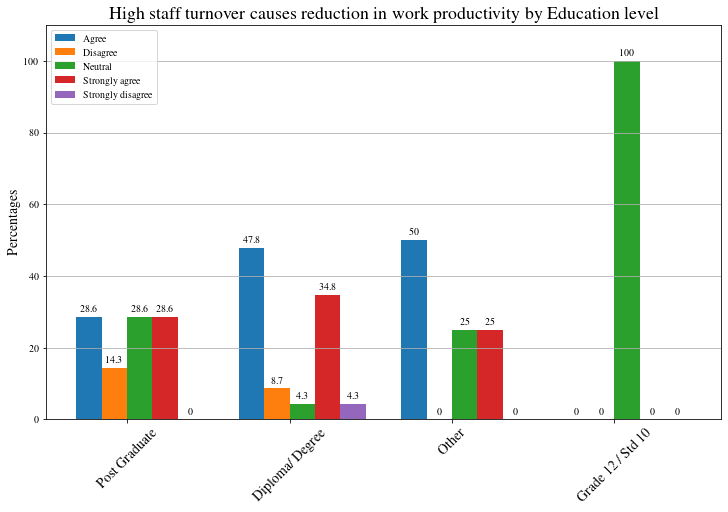

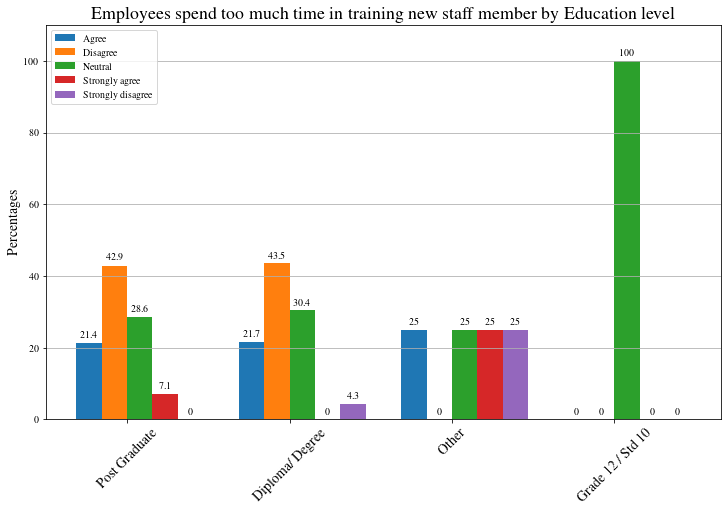

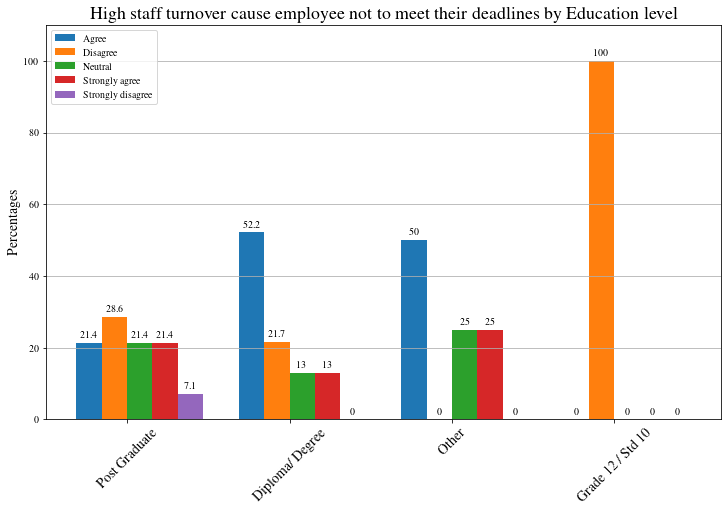

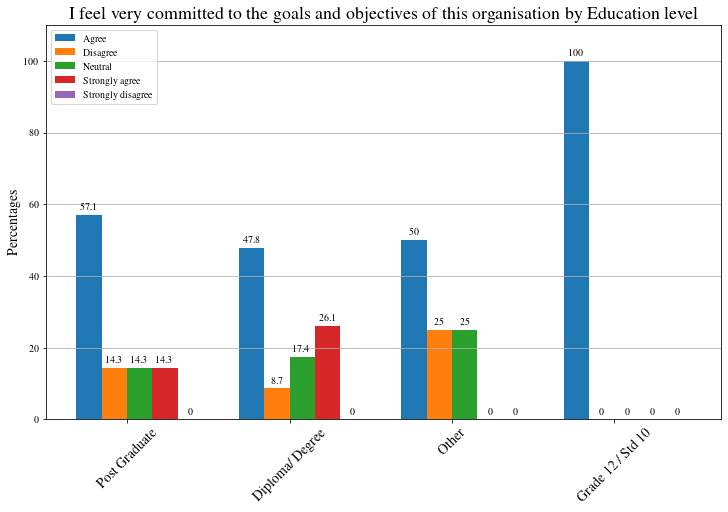

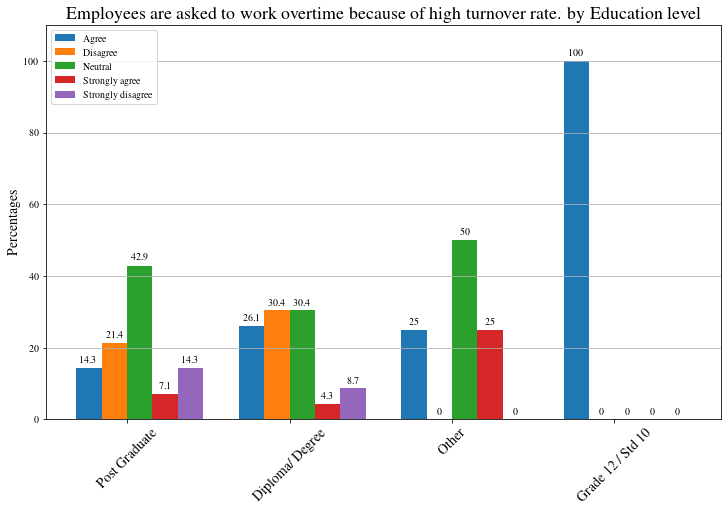

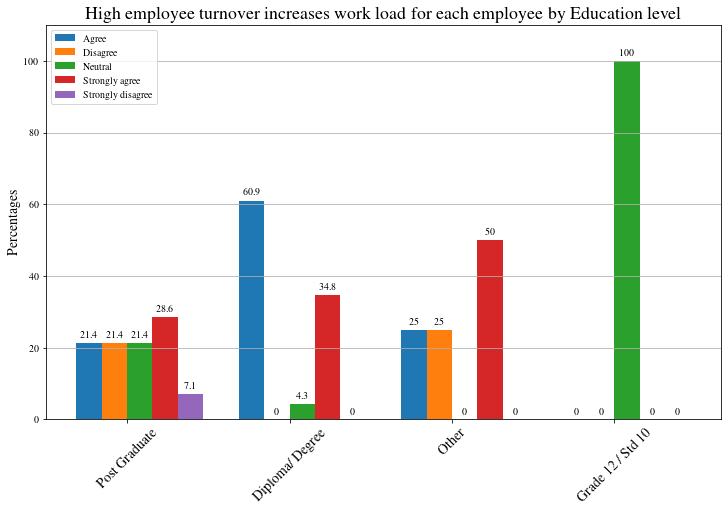

In [335]:
# Loops for all variables plotting
Dem_cols = data_text_adjusted.columns[:4]
Lik_cols = data_text_adjusted.columns[4:]
for dem_col in Dem_cols:
    for lik_col,i in zip(Lik_cols,range(len(Lik_cols))):
        percentages = count_on_col(data_text_adjusted,dem_col=dem_col,asses_col=lik_col)
        keep = perc_mapper(percentages)
        grouped_plotter(data_text_adjusted,percentages,keep,col=dem_col,title=lik_col)
        

#### Chi-square tests 

In [336]:
from scipy import stats 

In [337]:
# Chi-square test for indepence between demographic virables and likert scale variables
Dem_cols = data_text_adjusted.columns[:4]
Lik_cols = data_text_adjusted.columns[4:]
rows = []
for dem_col in Dem_cols:
    for lik_col,i in zip(Lik_cols,range(len(Lik_cols))):       
        ct = pd.crosstab(data_text_adjusted[dem_col],data_text_adjusted[lik_col])
        chi_value = stats.chi2_contingency(ct)[0]
        p_value = stats.chi2_contingency(ct)[1]
        rows.append([dem_col,lik_col,round(chi_value,3),round(p_value,3)])
chi_res_df = pd.DataFrame(data = rows, columns = ['Demographic Feature', 'Section B Features','Chi-Square','p-value'])

In [338]:
chi_res_df.to_csv('Chi-square_test_results_demographic_vs_likert.csv')

In [339]:
from scipy.stats import chisquare # For single variable chi-square test. are categories different?


In [340]:
def obs_maker(data,col):    
    keeper = {'Agree':0,'Disagree':0,'Neutral':0,'Strongly agree':0,'Strongly disagree':0}
    pres = data.groupby([col]).size().to_dict()
    keeper.update(pres)
    f_obs = keeper.values()
    f_obs = np.array(list(f_obs))
    return f_obs

In [341]:
#data_text_adjusted[data_text_adjusted.columns[7]].unique()

In [342]:
chi_sing = []
for col in data_text_adjusted.columns[4:]:
    f_obs = obs_maker(data_text_adjusted,col)
    f_obsper = np.round((f_obs/data_text_adjusted.shape[0])*100,2)
    f_exp = np.array([0.2,0.2,0.2,0.2,0.2])*f_obs.sum()
    chi_value = round(chisquare(f_obs=f_obs, f_exp=f_exp)[0],3)
    p_value = round(chisquare(f_obs=f_obs, f_exp=f_exp)[1],3)
    
    chi_sing.append([col,f'{f_obs[0]}({f_obsper[0]}%)',f'{f_obs[1]}({f_obsper[1]}%)',f'{f_obs[2]}({f_obsper[2]}%)',f'{f_obs[3]}({f_obsper[3]}%)',f'{f_obs[4]}({f_obsper[4]}%)',chi_value,p_value])
chi_sing_df = pd.DataFrame(data = chi_sing, columns = ['Variable','Agree(%)','Disagree(%)','Neutral(%)','Strongly agree(%)','Strongly disagree(%)','Chi-square','p-value'])

In [343]:
chi_sing_df.to_csv('Chi-square_single_variable_likert.csv')

In [344]:
data_text_adjusted.shape

(42, 18)

In [349]:
data_all_adjusted = data[data.columns[:4]]

In [351]:
data_all_adjusted[data_adj_num.columns] = data_adj_num

In [353]:
data_all_adjusted.corr().to_csv('correlation_all_variables.csv')

In [354]:
from scipy.stats import pearsonr

In [357]:
correlation, p_value = pearsonr(data_all_adjusted[data_all_adjusted.columns[2]],data_all_adjusted[data_all_adjusted.columns[7]])

In [362]:
#calculation correlation coefficient and p-value between x and y
correlation_pvalue = []
for col1 in data_all_adjusted.columns:
    for col2 in data_all_adjusted.columns:
        correlation, p_value  = pearsonr(data_all_adjusted[col1],data_all_adjusted[col2])#correlation_pvalue.append()
        #pearsonr(df_new[col1], df_new[col2])
        correlation_pvalue.append([col1,col2,round(correlation,3),round(p_value,3)])
correlation_pvalue_df = pd.DataFrame(data=correlation_pvalue,columns = ['variable1', 'variable2','Pearson-correlation','pvalue'])

In [364]:
correlation_pvalue_df

,variable1,variable2,Pearson-correlation,pvalue
0,Gender,Gender,1.000,0.000
1,Gender,Age,0.006,0.972
2,Gender,Years Worked,0.060,0.707
3,Gender,Education level,-0.094,0.554
4,Gender,I do intend to leave the organisation,0.086,0.590
...,...,...,...,...
319,High employee turnover increases work load for...,Employees spend too much time in training new ...,0.470,0.002
320,High employee turnover increases work load for...,High staff turnover cause employee not to meet...,0.402,0.008
321,High employee turnover increases work load for...,I feel very committed to the goals and objecti...,0.330,0.033
322,High employee turnover increases work load for...,Employees are asked to work overtime because o...,0.434,0.004


In [363]:
correlation_pvalue_df.to_csv('Variable_correlations.csv')

In [56]:
#df_percentage(cat_counter_SE_by_gender_and_MS(demo_SE)[0])

In [36]:
demo_SE['Q6'] = demo_SE['Q6'].fillna(demo_SE['Q6'].mode()[0])
demo_SE['Q4_5'] = demo_SE['Q4_5'].fillna(demo_SE['Q4_5'].mode()[0])
demo_SE['Q4_8'] = demo_SE['Q4_8'].fillna(demo_SE['Q4_8'].mode()[0])
demo_SE['Q4_11'] = demo_SE['Q4_11'].fillna(demo_SE['Q4_11'].mode()[0])

In [37]:
#demo_SE.info()

In [38]:
demo_SE[['Q4_5','Q4_8','Q4_11']] = demo_SE[['Q4_5','Q4_8','Q4_11']].astype(int)

In [39]:
demo_SE[demo_SE.columns[-15:]] = demo_SE[demo_SE.columns[-15:]].astype(int).astype(str)

In [40]:
def cat_counter_SE(demo_SE):
    """Counts of collective efficacy likertscale values for the whole dataset"""
    cat_counts_all = [] 
    for quest in demo_SE.columns[-15:]:
        cat_counts = [Counter(demo_SE[quest])[k] for k in '12345']
        cat_counts_all.append(cat_counts)              
    return pd.DataFrame(data = cat_counts_all,columns = ['Strongly unable to perform','Unable to perform','Neutral','Able to perform','Strongly able to perform'],
                        index = demo_SE.columns[-15:])           
           

In [24]:
#cat_counter_SE(demo_SE).head()

In [41]:
# Counts
cat_counter_SE(demo_SE).to_csv('All_Counts_SE.csv')

In [43]:
#Percentages
cat_percentage_SE = df_percentage(cat_counter_SE(demo_SE))
round(cat_percentage_SE,2).to_csv('All_percentage_SE.csv')

In [46]:
cat_percentage_SE.round(2)

,Strongly unable to perform,Unable to perform,Neutral,Able to perform,Strongly able to perform
Q4_1,2.34,5.99,19.01,30.21,42.45
Q4_2,19.79,6.51,15.89,34.11,23.70
Q4_3,1.30,6.25,16.93,33.07,42.45
Q4_4,10.94,13.54,26.30,20.83,28.39
Q4_5,1.82,5.21,22.92,33.85,36.20
Q4_6,3.39,7.81,23.70,27.60,37.50
Q4_7,2.08,3.65,16.93,32.81,44.53
Q4_8,2.08,2.60,17.71,36.46,41.15
Q4_9,5.99,7.29,27.08,26.04,33.59
Q4_10,17.45,17.45,25.52,13.28,26.30


In [28]:
#df_percentage(cat_counter_SE(demo_SE))

In [47]:
def cat_counter_SE_by_Gender(demo_SE):
    """Counts of self efficacy likertscale values for the dataset split by gender"""
    cat_countsM = [] 
    cat_countsF = [] 
    demo_CE_M = demo_SE[demo_SE['Q1']==1]
    demo_CE_F = demo_SE[demo_SE['Q1']==2]
    for quest in demo_SE.columns[-15:]:
        cat_counts_M = [Counter(demo_CE_M[quest])[k] for k in '12345']
        cat_counts_F = [Counter(demo_CE_F[quest])[k] for k in '12345']
        cat_countsM.append(cat_counts_M)
        cat_countsF.append(cat_counts_F)        
    return pd.DataFrame(data = cat_countsM,columns = ['Strongly unable to perform','Unable to perform','Neutral','Able to perform','Strongly able to perform'],
                        index = ['M_'+ quest for quest in demo_SE.columns[-15:]]), pd.DataFrame(data = cat_countsF,columns = ['Strongly unable to perform','Unable to perform','Neutral','Able to perform','Strongly able to perform'],
                        index = ['F_'+ quest for quest in demo_SE.columns[-15:]]) 
           
            

In [48]:
cat_counter_SE_by_Gender(demo_SE)[0].to_csv('All_Counts_M_SE.csv')
cat_counter_SE_by_Gender(demo_SE)[1].to_csv('All_Counts_F_SE.csv')

In [49]:
round(df_percentage(cat_counter_SE_by_Gender(demo_SE)[0]),2).to_csv('percentage_M_SE.csv')
round(df_percentage(cat_counter_SE_by_Gender(demo_SE)[1]),2).to_csv('percentage_F_SE.csv')

In [50]:
def cat_counter_SE_by_gender_and_MS(demo_SE):
    """Counts of collective efficacy likertscale values for the dataset split first by gender and then by Marital Status"""
    indM =[]
    indF =[]
    cat_countsM = [] 
    cat_countsF = [] 
    MS = ['S','M','Dp','W','D','Sep']
    demo_CE_M = demo_SE[demo_SE['Q1']==1]
    demo_CE_F = demo_SE[demo_SE['Q1']==2]
    for i, ms in zip(demo_SE['Q5'].unique(),MS):
        M_ms_cati = demo_CE_M[demo_CE_M['Q5'] == i]
        F_ms_cati = demo_CE_F[demo_CE_F['Q5'] == i]
        for quest in demo_SE.columns[-15:]:
            cat_counts_M = [Counter(M_ms_cati[quest])[k] for k in '12345']
            cat_counts_F = [Counter(F_ms_cati[quest])[k] for k in '12345']
            cat_countsM.append(cat_counts_M)
            cat_countsF.append(cat_counts_F)
            indM.append('M_'+ms+'_'+quest)
            indF.append('F_'+ms+'_'+quest)
    return pd.DataFrame(data = cat_countsM,columns = ['Strongly disagree','Disagree','Neutral','Agree','Strongly agree'],
                        index = indM ), pd.DataFrame(data = cat_countsF,columns = ['Strongly disagree','Disagree','Neutral','Agree','Strongly agree'],
                        index = indF) 
           
            

In [51]:
cat_counter_SE_by_gender_and_MS_sum = cat_counter_SE_by_gender_and_MS(demo_SE)[0]

In [52]:
cat_counter_SE_by_gender_and_MS(demo_SE)[0].to_csv('All_Counts_M_MS_SE.csv')
cat_counter_SE_by_gender_and_MS(demo_SE)[1].to_csv('All_Counts_F_MS_SE.csv')

In [53]:
cat_percentage_SE_M_and_MS = df_percentage(cat_counter_SE_by_gender_and_MS(demo_SE)[0]).replace(np.nan,0)
round(cat_percentage_SE_M_and_MS,2).to_csv('percentage_M_MS_SE.csv')
cat_percentage_SE_F_and_MS = df_percentage(cat_counter_SE_by_gender_and_MS(demo_SE)[1]).replace(np.nan,0)
round(cat_percentage_SE_F_and_MS,2).to_csv('percentage_F_MS_SE.csv')

In [40]:
#cat_percentage_SE_F_and_MS.info()

In [14]:
count_engaging_in_each_Barrier.T.head()

,Q1_1,Q1_2,Q1_3,Q1_4,Q1_5,Q1_6,Q1_7,Q1_8,Q1_9,Q1_10,Q1_11,Q1_12
Count,251.0,134.0,65.0,185.0,67.0,85.0,114.0,86.0,51.0,12.0,16.0,48.0


In [14]:
count_engaging_in_each_Barrier.T.astype(int).to_csv('All_Counts_BA.csv')

In [15]:
#percentage of total
# As percentages of sample (n)
round(((count_engaging_in_each_Barrier.T/384)*100),2).to_csv('All_percentages_BA.csv')

In [15]:
# By gender (Male)
count_engaging_in_each_Barrier_Male =pd.DataFrame(demo_BA[demo_BA['Q2'] ==1 ][demo_BA.columns[-12:]].sum().values, 
                                                     columns=['Count'],index = ['M_'+quest for quest in demo_BA.columns[-12:]])

In [16]:
count_engaging_in_each_Barrier_Male.T.astype(int).to_csv('All_Counts_M_BA.csv')

In [17]:
# As percentages of sample subgroup
round(((count_engaging_in_each_Barrier_Male.T/150)*100),2).to_csv('percentages_M_BA.csv')

In [18]:
# By gender (Female)
count_engaging_in_each_Barrier_Female =pd.DataFrame(demo_BA[demo_BA['Q2'] ==2 ][demo_BA.columns[-12:]].sum().values, 
                                                     columns=['Count'],index = ['F_'+quest for quest in demo_BA.columns[-12:]])

In [19]:
count_engaging_in_each_Barrier_Female.T.astype(int).to_csv('All_Counts_F_BA.csv')

In [20]:
# As percentages of sample subgroup
round(((count_engaging_in_each_Barrier_Female.T/234)*100),2).to_csv('percentages_F_BA.csv')

In [21]:
def Barriers_counts_by_gender_and_MS(demo_DA):
    quest_sums_male = []
    quest_sums_female = []
    indM =[]
    indF =[]
    MS = ['S','M','Dp','W','D','Sep']
    adpt_strategies = demo_DA.columns[-12:]
    demo_DA_M = demo_DA[demo_DA['Q2'] ==1]
    demo_DA_F = demo_DA[demo_DA['Q2'] ==2]
    for i,ms in zip(demo_DA['Q5'].unique(),MS):
        quest_sums_male.append(list(demo_DA_M[demo_DA_M['Q5'] ==i ][demo_DA.columns[-12:]].sum().values))
        quest_sums_female.append(list(demo_DA_F[demo_DA_F['Q5'] ==i ][demo_DA.columns[-12:]].sum().values))
        indM.append('M_'+ms)
        indF.append('F_'+ms)
    return pd.DataFrame(data = quest_sums_male, columns = adpt_strategies,index=indM), pd.DataFrame(data = quest_sums_female, columns = adpt_strategies,index=indF)
    

In [22]:
Barriers_counts_by_gender_and_MS(demo_BA)[0].astype(int).to_csv('All_Counts_M_MS_BA.csv')
Barriers_counts_by_gender_and_MS(demo_BA)[1].astype(int).to_csv('All_Counts_F_MS_BA.csv')

In [23]:
#counts for percentage computations
Barriers_counts_M_and_MS = Barriers_counts_by_gender_and_MS(demo_BA)[0].astype(int)
Barriers_counts_F_and_MS = Barriers_counts_by_gender_and_MS(demo_BA)[1].astype(int)

In [27]:
#Barriers_counts_F_and_MS

In [28]:
# Percentage convertion function for any counts dataframe (must be shifted to the function space) some python module
def df_percentage_BA(dataframe,divisors): 
    dataframe["Total"] = divisors
    percentage_data = [((dataframe[dataframe.columns[:-1]].iloc[i]/dataframe[dataframe.columns[-1]].iloc[i])*100).values for i in range(dataframe.shape[0])]
    percentage_dataframe = pd.DataFrame(data = percentage_data, columns = dataframe.columns[:-1], index = dataframe.index)
    return percentage_dataframe

In [29]:
divisors_m = [demo_BA[demo_BA['Q1']==1][demo_BA['Q5']==i].shape[0] for i in demo_BA['Q5'].unique()]
round(df_percentage_BA(Barriers_counts_M_and_MS,divisors_m),2).to_csv('Percentage_M_MS_BA.csv')

/home/felix/Documents/Environments/Deep_learning_env/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [30]:
divisors_f = [demo_BA[demo_BA['Q1']==2][demo_BA['Q5']==i].shape[0] for i in demo_BA['Q5'].unique()]
round(df_percentage_BA(Barriers_counts_F_and_MS,divisors_f),2).to_csv('Percentage_F_MS_BA.csv')

/home/felix/Documents/Environments/Deep_learning_env/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [75]:
#Barriers_counts_by_gender_and_MS(demo_BA)[1]